# Insurance Fraud Detection 

Insurance Fraud Detection Data Description:

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

#### from above we can see all the information about the dataset lets now import all the essential libraries in Python for Importing the Dataset, EDA, Data Preprocessing, Removing Outliers, Removing Skewness, Dividing the dataset, training and testing the dataset and then to create the model and saving the best model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
from scipy.stats import zscore
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.metrics import accuracy_score,  classification_report,  confusion_matrix, f1_score, auc, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

as we have imported all the essential libraries let us now import the data using pandas.read_csv() and save it in ds variable

In [2]:
ds = pd.read_csv("~/Desktop/Datatrained/Insurance Claim Fraud Detection/Automobile_insurance_fraud.csv")

as we have stored out data in ds variable lets us now look at the data using ds.head() it will show us the first 5 rows of the dataset

In [3]:
ds.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

from above we can see first 5 rows and all the columns in the dataset

lets now see the shape of the data using ds.shape

In [4]:
r, c = ds.shape
print("Number of Rows are {} and Number of Columns are {}".format(r, c))

Number of Rows are 1000 and Number of Columns are 40


from above we can see that there are 1000. rows and 40 column in the dataset 

now let us look if there are any NaN values in the dataset or not using ds.isnull().sum()

In [5]:
ds.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

from above we can see that only last column has all the rows as NaN so we will drop that column as it dosen't have any values and it will not be benifiting us

so lets us drop that column using ds.drop()

In [6]:
ds.drop('_c39', axis = 1, inplace = True)

now lets ee the NaN values again

In [7]:
ds.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

from above we can see we have removed that column and now we are having zero NaN values in our data

lets see the visualization of these using heatmap

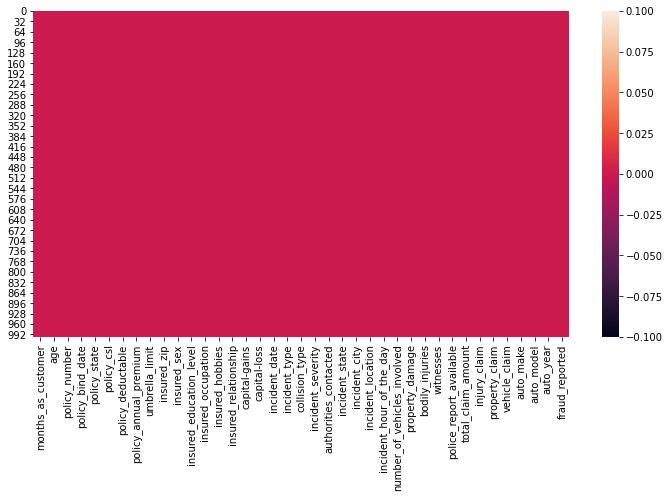

In [8]:
plt.figure(figsize = (12,6))
sns.heatmap(ds.isnull())

as the graph is unicoloured there is no missing values in the dataset

now lets see more information about the data using ds.info()

In [9]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

from above we can see there are 1000 rows and 39 columns in the dataset in which 21 columns are object type and 17 of them are int64 and 1 is float type

lets now see all the values in the column using value_counts()

In [10]:
for i in ds.columns:
    print(ds[i].value_counts())

194    8
285    7
140    7
230    7
128    7
      ..
347    1
113    1
337    1
117    1
0      1
Name: months_as_customer, Length: 391, dtype: int64
43    49
39    48
41    45
34    44
30    42
31    42
38    42
37    41
33    39
32    38
40    38
29    35
46    33
35    32
36    32
42    32
44    32
28    30
45    26
26    26
48    25
47    24
27    24
57    16
25    14
49    14
55    14
50    13
53    13
61    10
24    10
54    10
60     9
51     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
22     1
20     1
19     1
Name: age, dtype: int64
116735    1
107181    1
430794    1
115399    1
328387    1
         ..
218456    1
179538    1
357713    1
247116    1
296960    1
Name: policy_number, Length: 1000, dtype: int64
01-01-2006    3
05-08-1992    3
28-04-1992    3
04-06-2000    2
07-12-1995    2
             ..
24-10-1997    1
11-09-2004    1
03-02-1993    1
11-07-2001    1
29-05-1999    1
Name: policy_bind_date, Length: 951, dtype: int64
OH   

from above we can see that there are some '?' values lets us replace those with missing

lets now see the names of all the columns using ds.columns

In [11]:
ds.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

now lets us see some Descriptive Statstics using ds.describe()

In [12]:
ds.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  
count     1000.000000    1000.000000  1000.000000  
mean      7399.570000   37928.950000  2005.103000  
std       4824.726179   18886.252893     6.015861  
min          0.000000      70.000000  1995.000000  
25%       4445.000000   30292.500000  2000.000000  
50%       6750.000000   42100.000000  2005.000000  
75%      10885.000000   50822.500000  2010.000000  
max      23670.000000   79560.000000  2015.000000

from above we can see the stastics about the data lets now visualize this to get more information

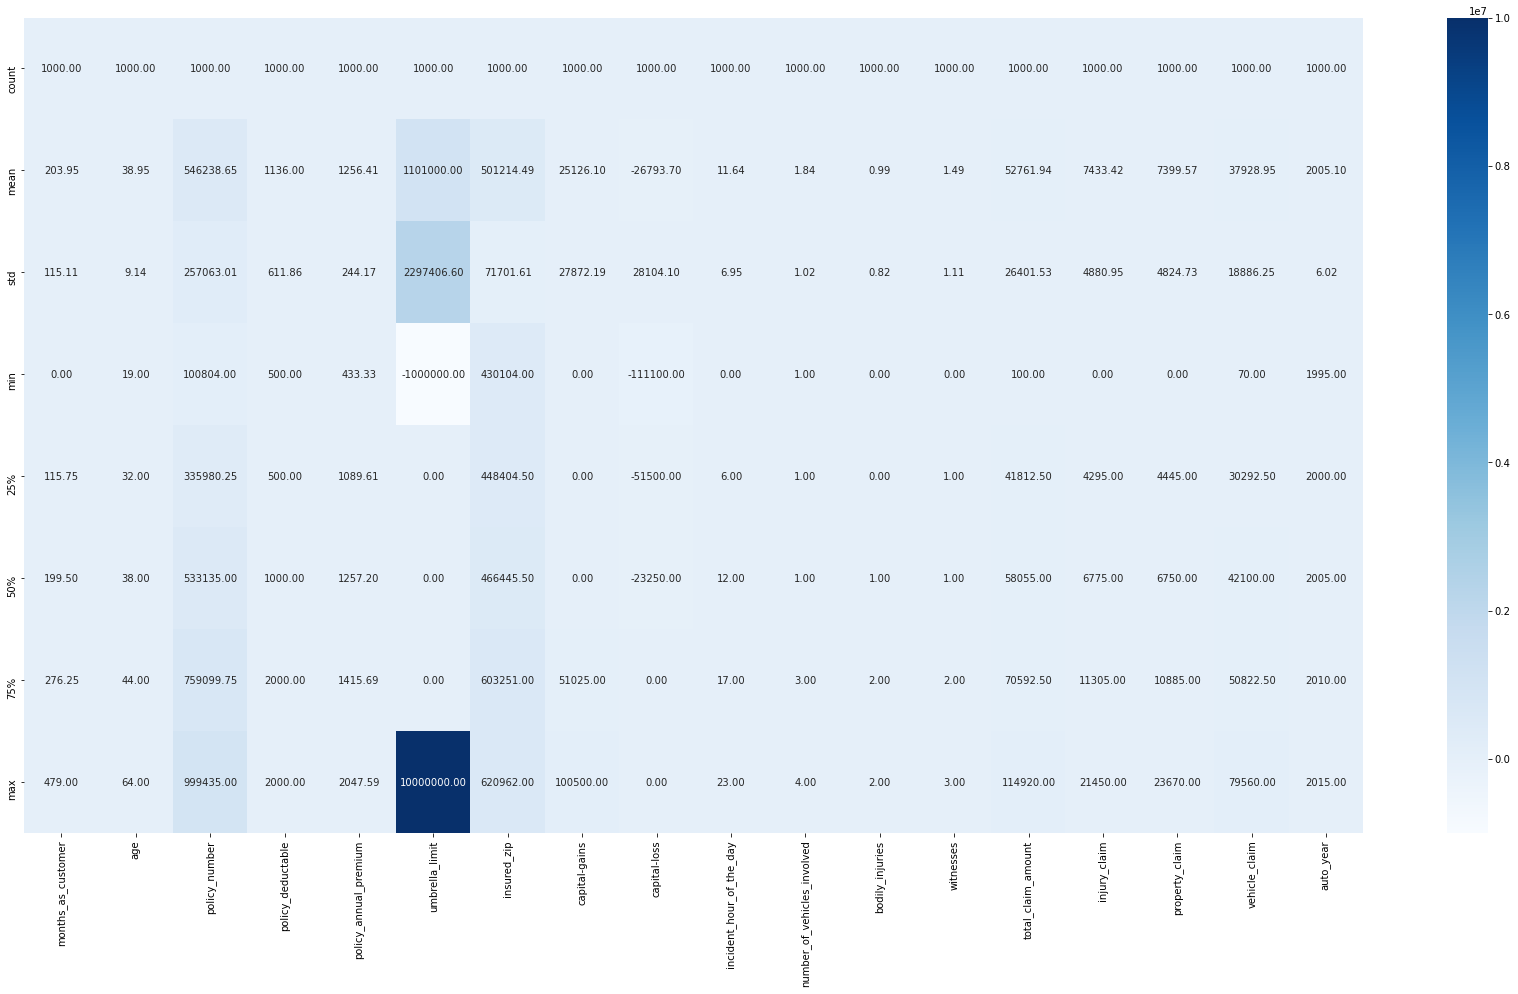

In [13]:
plt.figure(figsize = (30,15))
sns.heatmap(ds.describe(), annot = True, fmt='.2f', cmap='Blues')

from above we can see umbrella_limit has a huge value in it we will fix it later now lets see correlation of data using ds.corr()

In [14]:
ds.corr()

months_as_customer       age  policy_number  \
months_as_customer                     1.000000  0.922098       0.057555   
age                                    0.922098  1.000000       0.059413   
policy_number                          0.057555  0.059413       1.000000   
policy_deductable                      0.026807  0.029188      -0.006738   
policy_annual_premium                  0.005018  0.014404       0.022566   
umbrella_limit                         0.015498  0.018126       0.008968   
insured_zip                            0.017895  0.025604       0.007083   
capital-gains                          0.006399 -0.007075       0.009802   
capital-loss                           0.020209  0.007368      -0.005669   
incident_hour_of_the_day               0.070639  0.087161       0.000113   
number_of_vehicles_involved            0.014736  0.022102       0.013432   
bodily_injuries                       -0.010162 -0.015679      -0.004558   
witnesses                              0.058383  0.052359      -0.012661   
total_claim_amount                     0.062108  0.069863      -0.018009   
injury_claim                           0.065329  0.075522      -0.008762   
property_claim                         0.034940  0.060898      -0.010678   
vehicle_claim                          0.061013  0.062588      -0.020184   
auto_year                             -0.000292  0.001354      -0.000183   

                             policy_deductable  policy_annual_premium  \
months_as_customer                    0.026807               0.005018   
age                                   0.029188               0.014404   
policy_number                        -0.006738               0.022566   
policy_deductable                     1.000000              -0.003245   
policy_annual_premium                -0.003245               1.000000   
umbrella_limit                        0.010870              -0.006247   
insured_zip                           0.004545               0.032354   
capital-gains                         0.035212              -0.013738   
capital-loss                         -0.023544               0.023547   
incident_hour_of_the_day              0.060935              -0.001578   
number_of_vehicles_involved           0.051214              -0.045991   
bodily_injuries                      -0.022765               0.026780   
witnesses                             0.066639               0.002332   
total_claim_amount                    0.022839               0.009094   
injury_claim                          0.039107              -0.017633   
property_claim                        0.064792              -0.011654   
vehicle_claim                         0.005269               0.020246   
auto_year                             0.026105              -0.049226   

                             umbrella_limit  insured_zip  capital-gains  \
months_as_customer                 0.015498     0.017895       0.006399   
age                                0.018126     0.025604      -0.007075   
policy_number                      0.008968     0.007083       0.009802   
policy_deductable                  0.010870     0.004545       0.035212   
policy_annual_premium             -0.006247     0.032354      -0.013738   
umbrella_limit                     1.000000     0.019671      -0.047268   
insured_zip                        0.019671     1.000000       0.006303   
capital-gains                     -0.047268     0.006303       1.000000   
capital-loss                      -0.024056     0.049372      -0.046904   
incident_hour_of_the_day          -0.023257     0.008274      -0.016406   
number_of_vehicles_involved       -0.021270     0.027448       0.061643   
bodily_injuries                    0.022743     0.028695       0.055829   
witnesses                         -0.006738     0.019805      -0.017651   
total_claim_amount                -0.040344    -0.033873       0.015980   
injury_claim                      -0.045412    -0.017495       0.025934

from above we can see the correlation of data now lets do visualization of this too

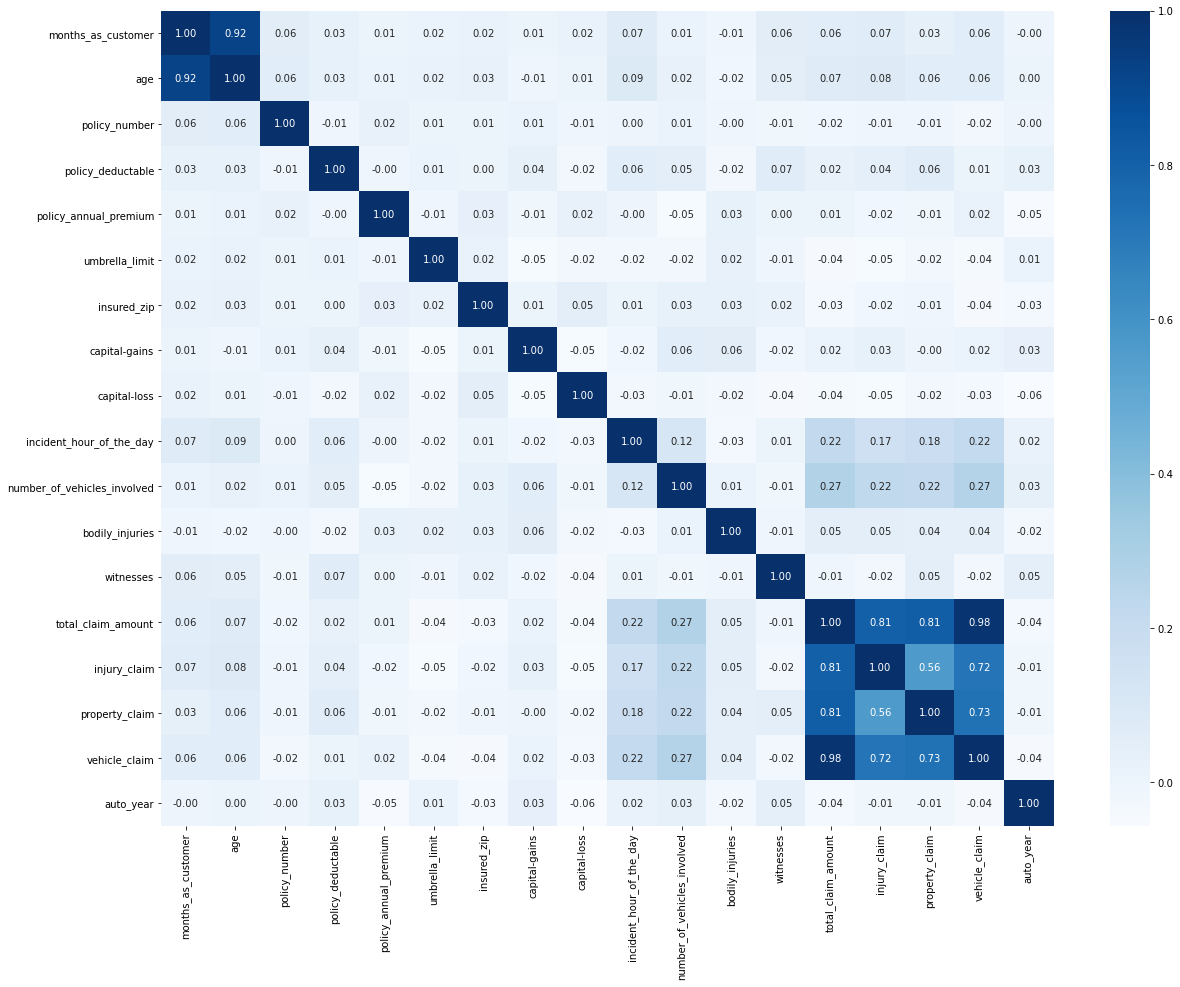

In [15]:
plt.figure(figsize = (20,15))
sns.heatmap(ds.corr(), annot = True, fmt = '.2f', cmap="Blues")

darker the area more is the correlation between the data from above we can see the correlation of the columns

lets see covariance of the dataset using ds.cov()

In [16]:
ds.cov()

months_as_customer            age  policy_number  \
months_as_customer                 1.325104e+04     970.201810   1.703130e+06   
age                                9.702018e+02      83.544841   1.395997e+05   
policy_number                      1.703130e+06  139599.665361   6.608139e+10   
policy_deductable                  1.888144e+03     163.235235  -1.059731e+06   
policy_annual_premium              1.410315e+02      32.145675   1.416366e+06   
umbrella_limit                     4.098745e+06  380632.632633   5.296036e+09   
insured_zip                        1.476998e+05   16780.292669   1.305565e+08   
capital-gains                      2.053193e+04   -1802.445245   7.023384e+07   
capital-loss                       6.537987e+04    1892.620220  -4.095652e+07   
incident_hour_of_the_day           5.652515e+01       5.538026   2.013220e+02   
number_of_vehicles_involved        1.728322e+00       0.205834   3.518009e+03   
bodily_injuries                   -9.593273e-01      -0.117534  -9.610359e+02   
witnesses                          7.468871e+00       0.531856  -3.617162e+03   
total_claim_amount                 1.887564e+05   16859.079960  -1.222275e+08   
injury_claim                       3.670575e+04    3369.297137  -1.099333e+07   
property_claim                     1.940521e+04    2685.543183  -1.324355e+07   
vehicle_claim                      1.326454e+05   10804.239640  -9.799063e+07   
auto_year                         -2.024645e-01       0.074430  -2.829887e+02   

                             policy_deductable  policy_annual_premium  \
months_as_customer                1.888144e+03           1.410315e+02   
age                               1.632352e+02           3.214568e+01   
policy_number                    -1.059731e+06           1.416366e+06   
policy_deductable                 3.743784e+05          -4.848613e+02   
policy_annual_premium            -4.848613e+02           5.961772e+04   
umbrella_limit                    1.527928e+07          -3.504155e+06   
insured_zip                       1.993895e+05           5.664307e+05   
capital-gains                     6.005009e+05          -9.349637e+04   
capital-loss                     -4.048617e+05           1.615803e+05   
incident_hour_of_the_day          2.591752e+02          -2.678940e+00   
number_of_vehicles_involved       3.192793e+01          -1.144158e+01   
bodily_injuries                  -1.142342e+01           5.362622e+00   
witnesses                         4.531331e+01           6.326876e-01   
total_claim_amount                3.689501e+05           5.862176e+04   
injury_claim                      1.167917e+05          -2.101409e+04   
property_claim                    1.912697e+05          -1.372875e+04   
vehicle_claim                     6.088869e+04           9.336460e+04   
auto_year                         9.608809e+01          -7.230676e+01   

                             umbrella_limit   insured_zip  capital-gains  \
months_as_customer             4.098745e+06  1.476998e+05   2.053193e+04   
age                            3.806326e+05  1.678029e+04  -1.802445e+03   
policy_number                  5.296036e+09  1.305565e+08   7.023384e+07   
policy_deductable              1.527928e+07  1.993895e+05   6.005009e+05   
policy_annual_premium         -3.504155e+06  5.664307e+05  -9.349637e+04   
umbrella_limit                 5.278077e+12  3.240420e+09  -3.026763e+09   
insured_zip                    3.240420e+09  5.141121e+09   1.259612e+07   
capital-gains                 -3.026763e+09  1.259612e+07   7.768588e+08   
capital-loss                  -1.553189e+09  9.948976e+07  -3.674132e+07   
incident_hour_of_the_day      -3.714154e+05  4.124026e+03  -3.178587e+03   
number_of_vehicles_involved   -4.978879e+04  2.005228e+03   1.750553e+03   
bodily_injuries                4.285085e+04  1.687420e+03   1.276185e+03   
witnesses                     -1.720420e+04  1.578176e+03  -5.467575e+02   
total_claim_amount            -2.4470

lets visualize the covariance using heatmap

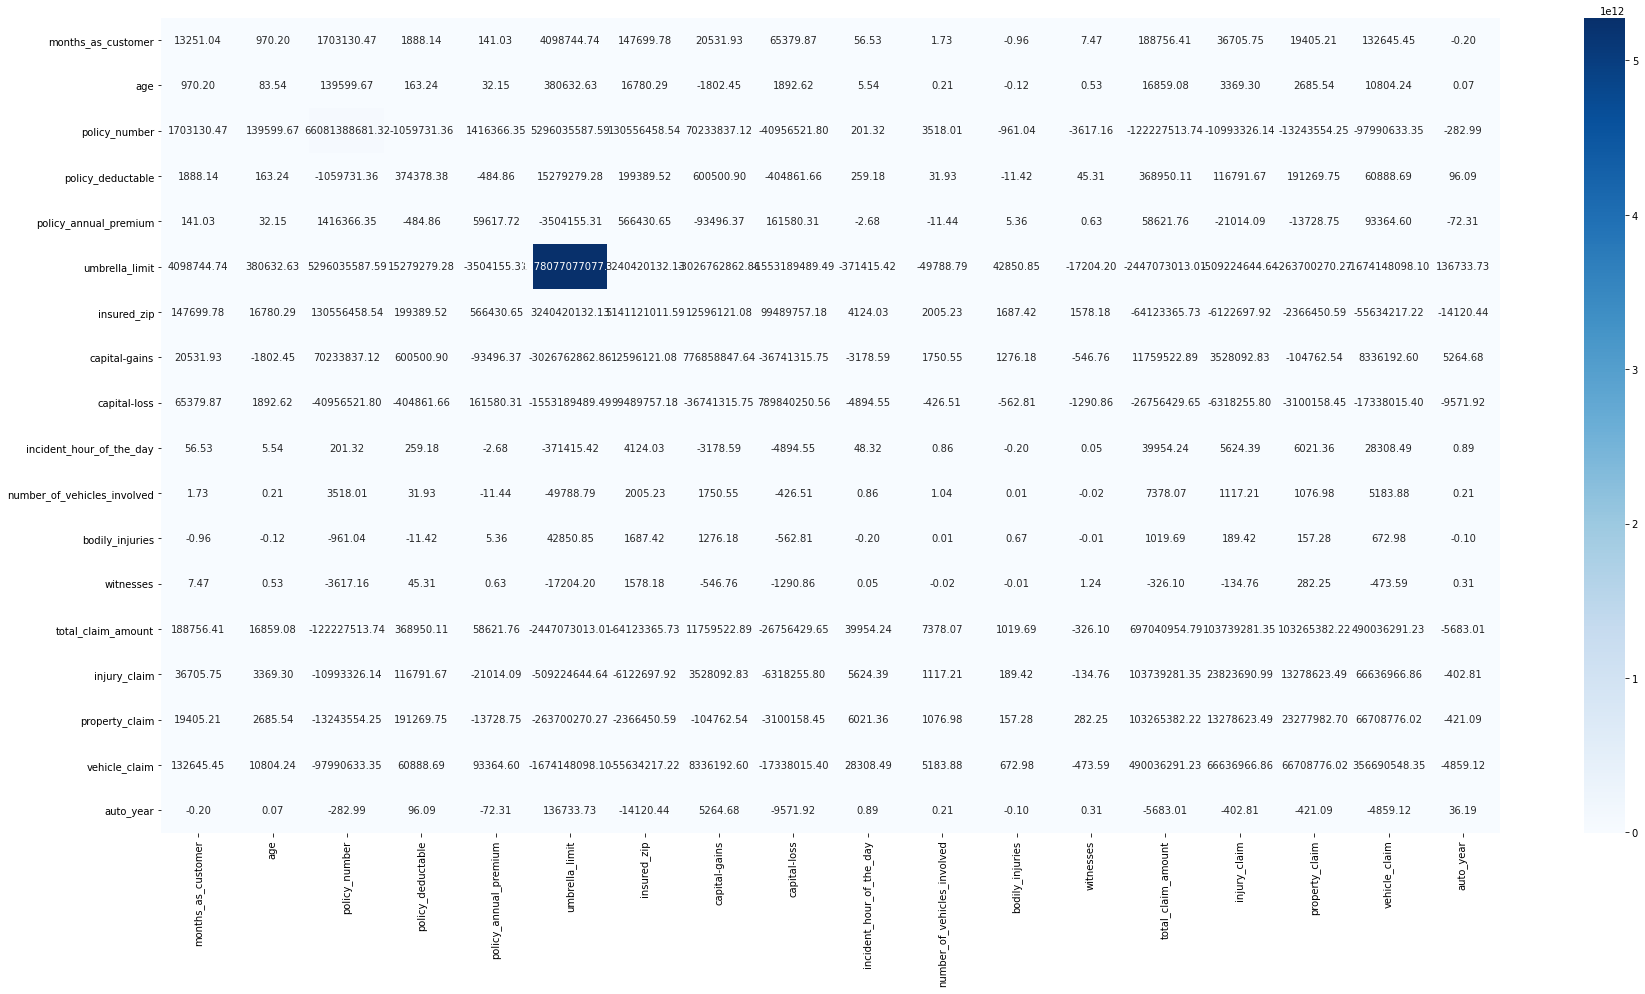

In [17]:
plt.figure(figsize = (30,15))
sns.heatmap(ds.cov(), annot=True, fmt='.2f', cmap='Blues')

from above we can see the covariance of the dataset

## lets now proceed and do EDA process to understand more about the data

In [18]:
ds.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... witnesses police_report_available total_claim_amount  \
0       466132  ...         2                     YES              71610   
1       468176  ...         0                       ?               5070   
2       430632  ...         3                      NO              34650   
3       608117  ...         2                      NO              63400   
4       610706  ...         1                      NO               6500   

  injury_claim property_claim  vehicle_claim  auto_make auto_model auto_year  \
0         6510          13020          52080       Saab        92x      2004   
1          780            780           3510   Mercedes       E400      2007   
2         7700           3850          23100      Dodge        RAM      2007   
3         6340           6340          50720  Chevrolet      Tahoe      2014   
4         1300            650           4550     Accura        RSX      2009   

  fraud_reported  
0              Y  
1              Y  
2              N  
3              Y  
4              N  

[5 rows x 39 columns]

lets see all the columns in the dataset by using pd.set_option

In [19]:
pd.set_option('display.max_columns', None)

In [20]:
ds.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    25-01-2015  Single Vehicle Collision   Side Collision      Major Damage   
1    21-01-2015             Vehicle Theft                ?      Minor Damage   
2    22-02-2015   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    10-01-2015  Single Vehicle Collision  Front Collision      Major Damage   
4    17-02-2015             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

from above wed can see all the columns in the dataset

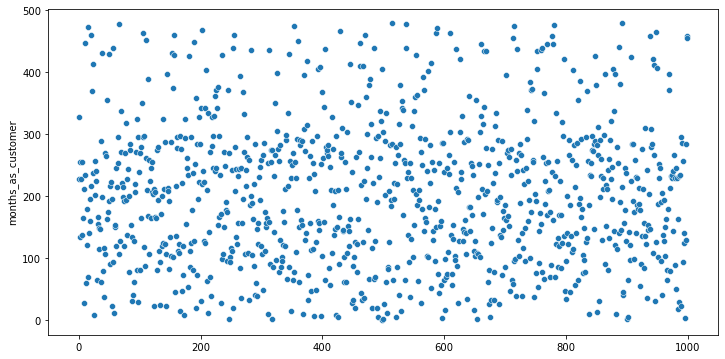

In [21]:
plt.figure(figsize = (12,6))
sns.scatterplot(ds.index, ds['months_as_customer'])

from above we can see the distribution of months as a customer

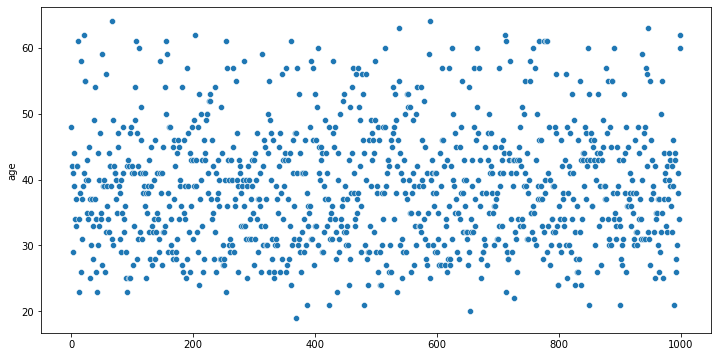

In [22]:
plt.figure(figsize = (12,6))
sns.scatterplot(ds.index,  ds['age'])

from above we can see the distribution of Age in the dataset

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


<BarContainer object of 1000 artists>

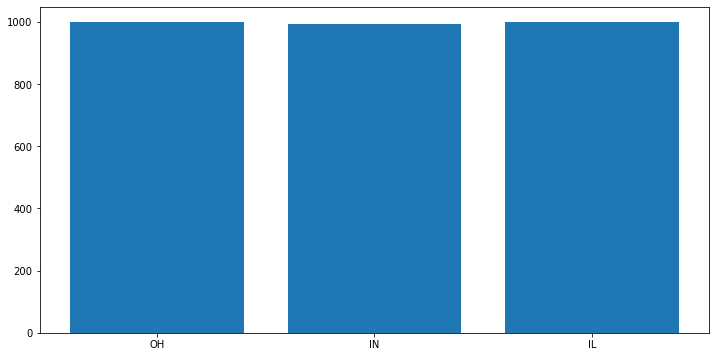

In [23]:
print(ds['policy_state'].value_counts())
plt.figure(figsize = (12,6))
plt.bar(ds['policy_state'], ds.index)

from above we can see that there are 3 major policies OH, IN, IL and highest number of policy state is of OH type

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


<BarContainer object of 1000 artists>

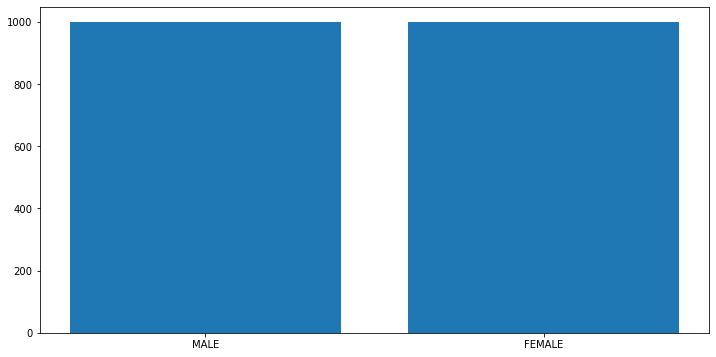

In [24]:
print(ds['insured_sex'].value_counts())
plt.figure(figsize = (12,6))
plt.bar(ds['insured_sex'], ds.index)

from above we can see that there are more number of females in the dataset than males

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


<BarContainer object of 1000 artists>

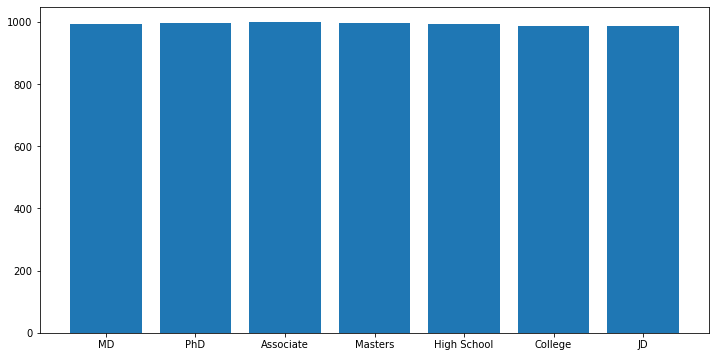

In [25]:
print(ds['insured_education_level'].value_counts())
plt.figure(figsize = (12,6))
plt.bar(ds['insured_education_level'], ds.index)

from above we can see the education level of all the users

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


<BarContainer object of 1000 artists>

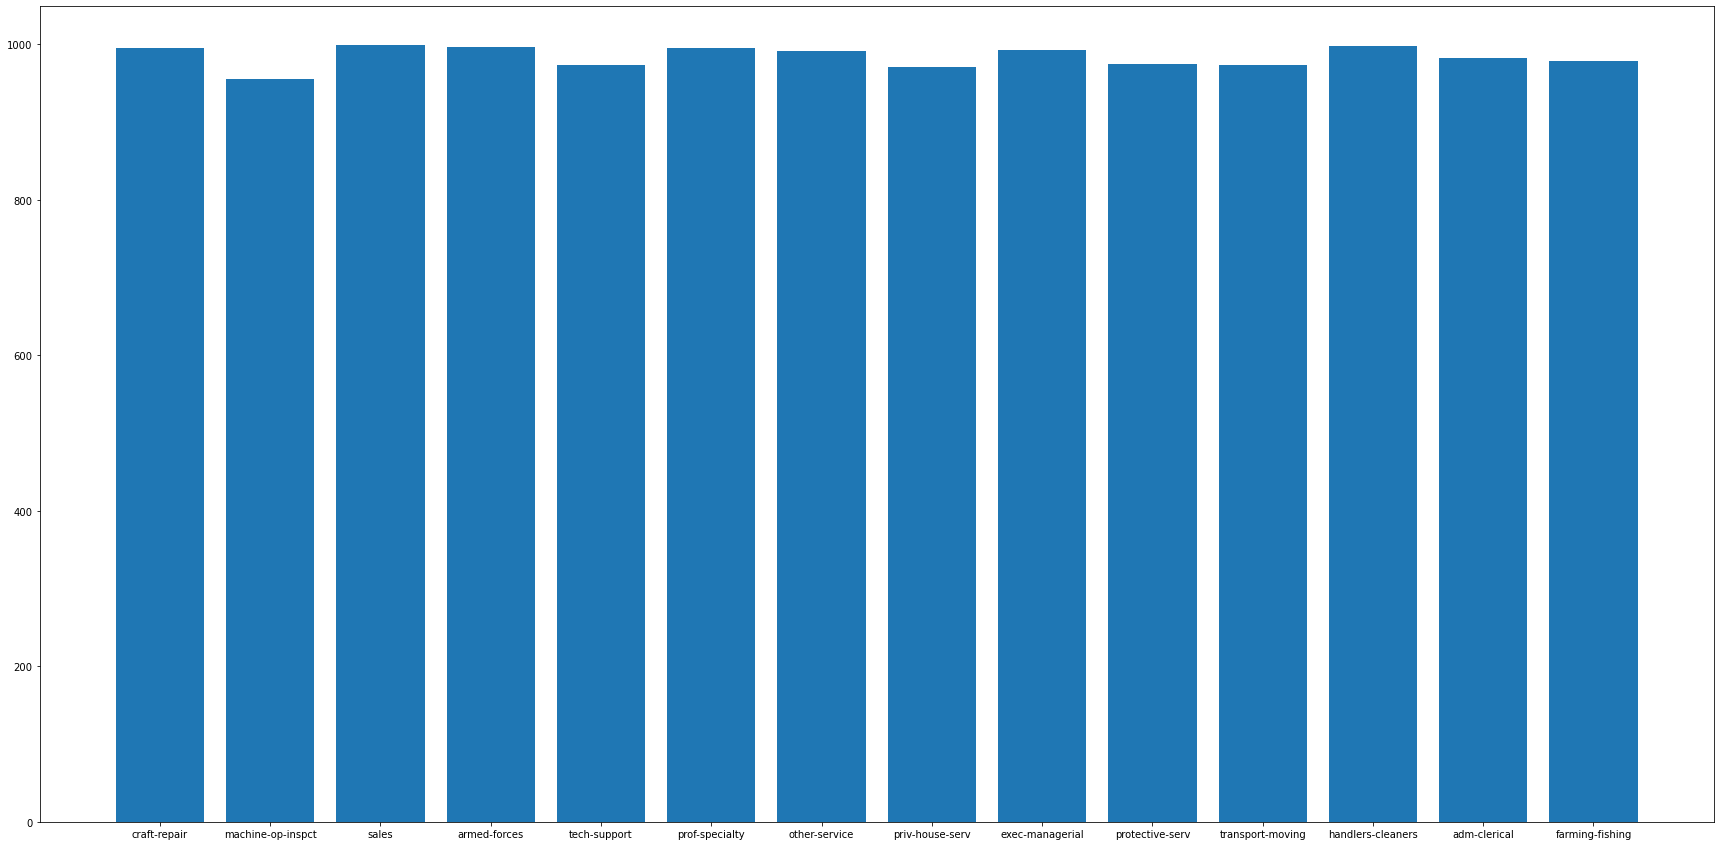

In [26]:
print(ds['insured_occupation'].value_counts())
plt.figure(figsize = (30,15))
plt.bar(ds['insured_occupation'], ds.index)

from above we can see the occupation of the insured users

reading           64
paintball         57
exercise          57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64


<BarContainer object of 1000 artists>

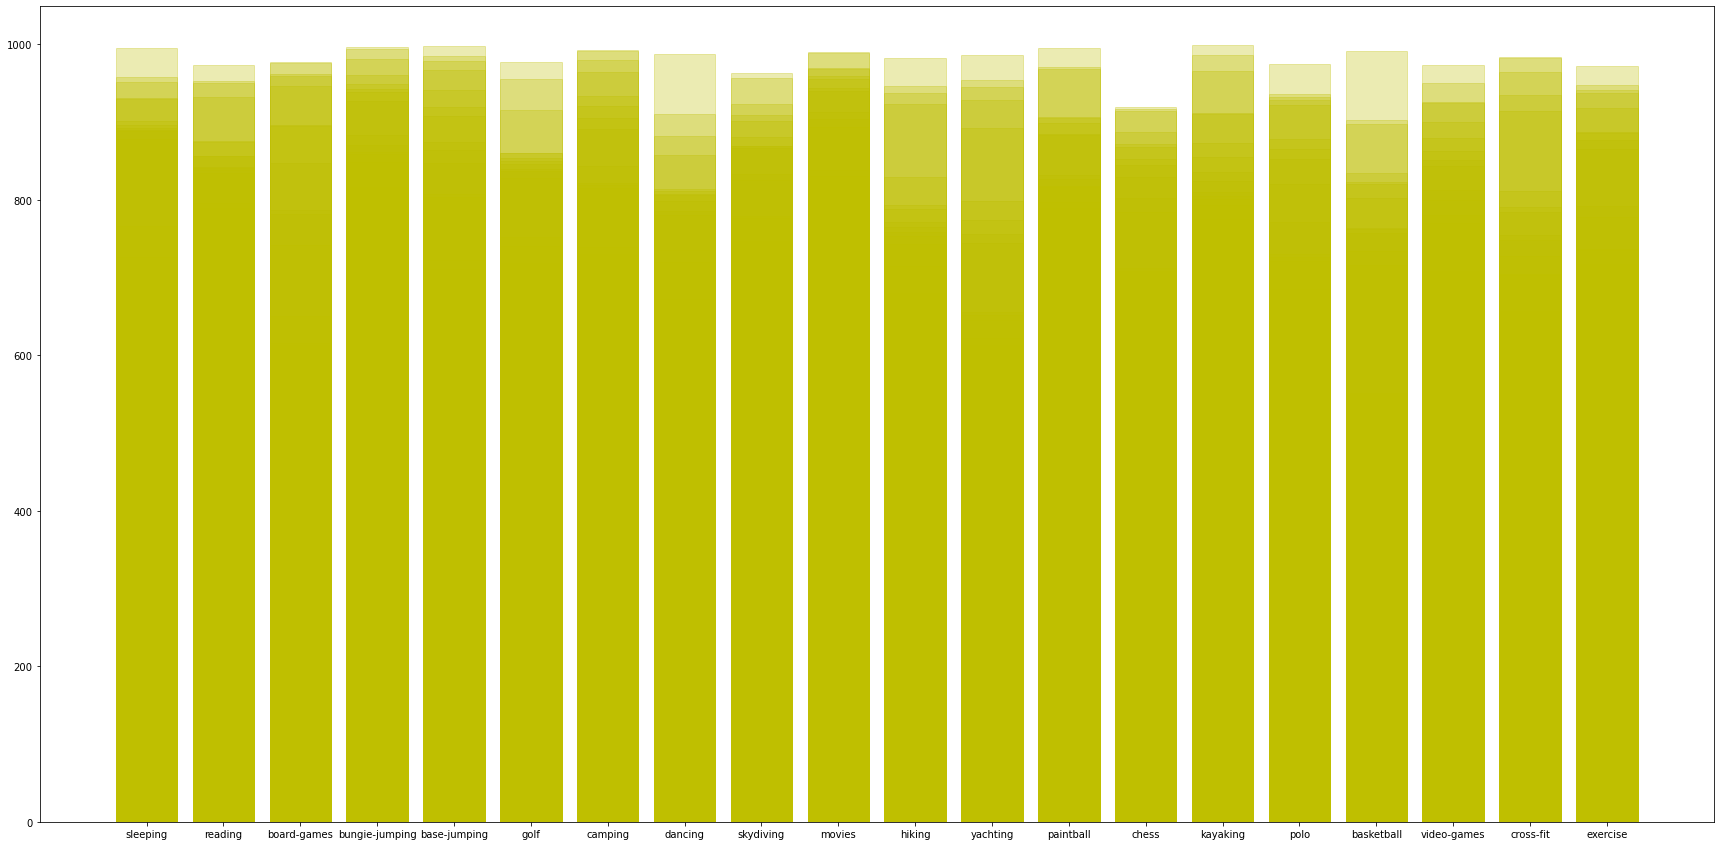

In [27]:
print(ds['insured_hobbies'].value_counts())
plt.figure(figsize = (30,15))
plt.bar(ds['insured_hobbies'], ds.index, Color='y', alpha = 0.3)

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64


<BarContainer object of 1000 artists>

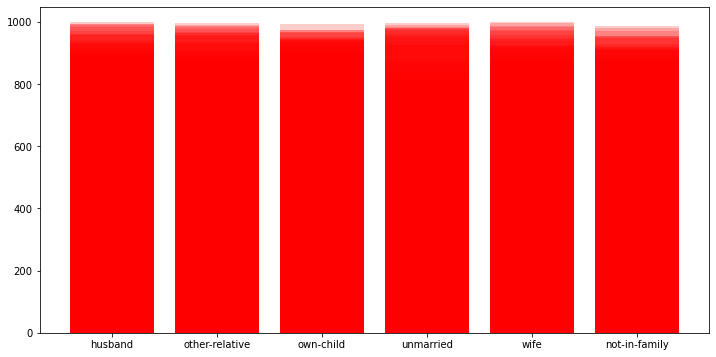

In [28]:
print(ds['insured_relationship'].value_counts())
plt.figure(figsize = (12,6))
plt.bar(ds['insured_relationship'], ds.index, color = 'r', alpha = 0.2)

form above we can see the relationship of the users

In [29]:
ds.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

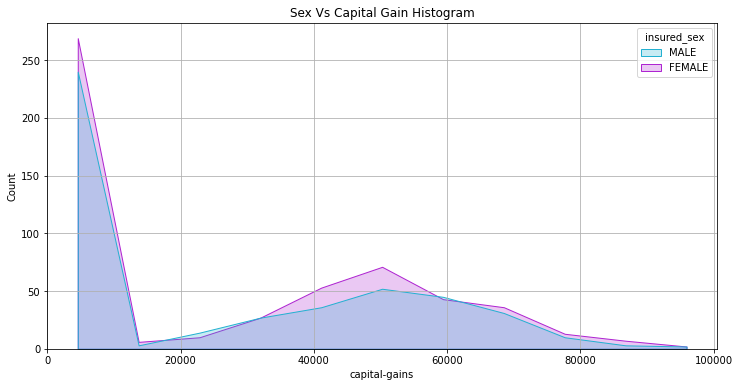

In [30]:
plt.figure(figsize = (12,6))
sns.histplot(x='capital-gains' ,hue='insured_sex' , data=ds ,element="poly", palette=('#24b1d1', '#ae24d1') );
plt.title("Sex Vs Capital Gain Histogram")
plt.grid()

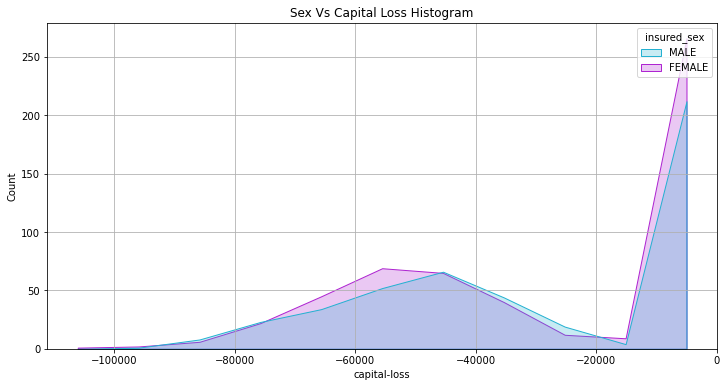

In [31]:
plt.figure(figsize = (12,6))
sns.histplot(x='capital-loss' ,hue='insured_sex' , data=ds ,element="poly", palette=('#24b1d1', '#ae24d1') );
plt.title("Sex Vs Capital Loss Histogram")
plt.grid()

In [32]:
ds.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    25-01-2015  Single Vehicle Collision   Side Collision      Major Damage   
1    21-01-2015             Vehicle Theft                ?      Minor Damage   
2    22-02-2015   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    10-01-2015  Single Vehicle Collision  Front Collision      Major Damage   
4    17-02-2015             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

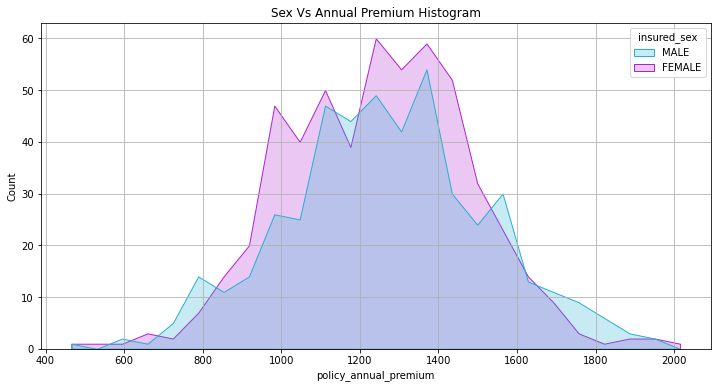

In [33]:
plt.figure(figsize = (12,6))
sns.histplot(x='policy_annual_premium' ,hue='insured_sex' , data=ds ,element="poly", palette=('#24b1d1', '#ae24d1') );
plt.title("Sex Vs Annual Premium Histogram")
plt.grid()

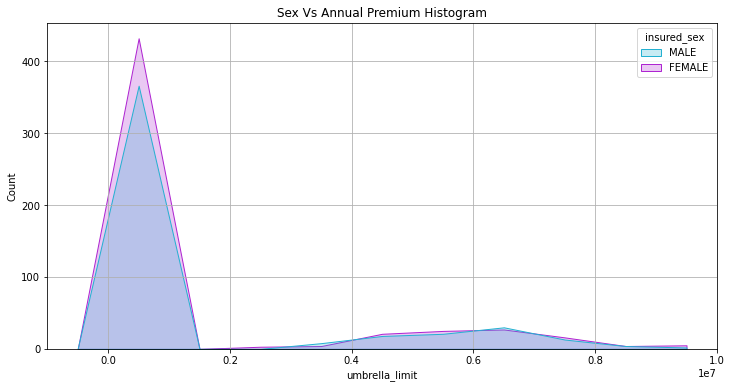

In [34]:
plt.figure(figsize = (12,6))
sns.histplot(x='umbrella_limit' ,hue='insured_sex' , data=ds ,element="poly", palette=('#24b1d1', '#ae24d1') );
plt.title("Sex Vs Annual Premium Histogram")
plt.grid()

lets see the graph of authorities contacted

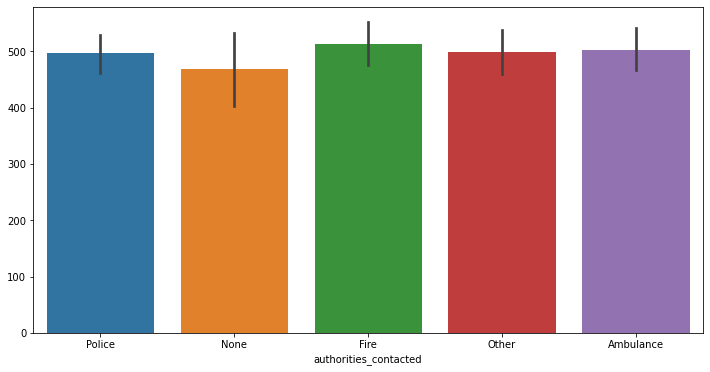

In [35]:
plt.figure(figsize = (12,6))
sns.barplot(ds['authorities_contacted'], ds.index)

from above we can see the authorities those who where contacted

In [36]:
ds.groupby(['insured_sex','authorities_contacted'])['fraud_reported'].count()

insured_sex  authorities_contacted
FEMALE       Ambulance                106
             Fire                     131
             None                      43
             Other                     95
             Police                   162
MALE         Ambulance                 90
             Fire                      92
             None                      48
             Other                    103
             Police                   130
Name: fraud_reported, dtype: int64

from above we can see the count of authorities contacted with respect to sex

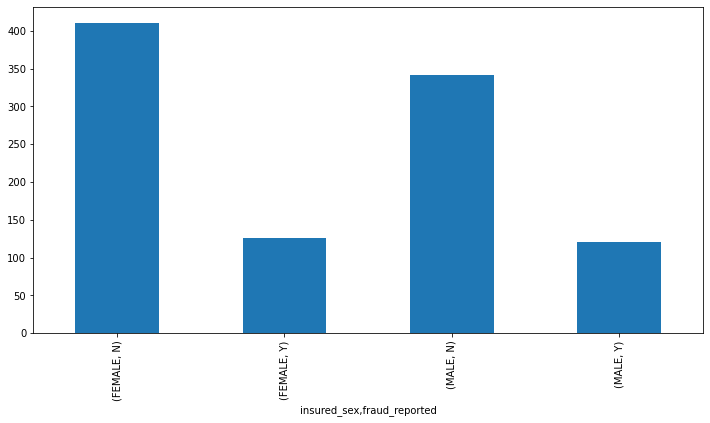

In [37]:
plt.figure(figsize = (12,6))
ds.groupby(['insured_sex','fraud_reported'])['fraud_reported'].count().plot.bar(ylim=0)

from above we can see the number of males and females who reported fraud and who are geniune

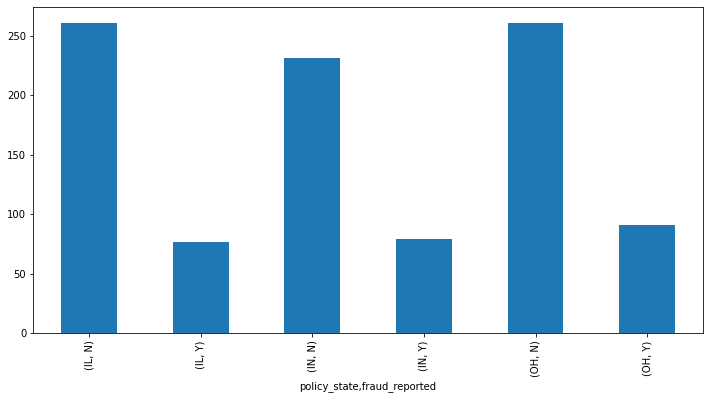

In [38]:
plt.figure(figsize = (12,6))
ds.groupby(['policy_state','fraud_reported'])['fraud_reported'].count().plot.bar(ylim=0)

from here we can see that if the policy state is OH it has the higher probablity of Fraud Claims

In [39]:
ds.groupby(['incident_severity','fraud_reported'])['fraud_reported'].count()

incident_severity  fraud_reported
Major Damage       N                 109
                   Y                 167
Minor Damage       N                 316
                   Y                  38
Total Loss         N                 244
                   Y                  36
Trivial Damage     N                  84
                   Y                   6
Name: fraud_reported, dtype: int64

In major damage we can see higher fraud reports

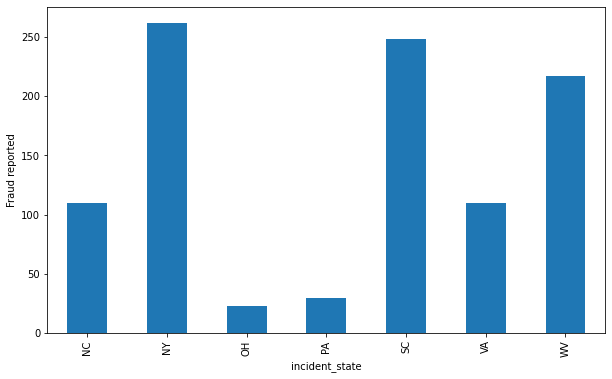

In [40]:
fig = plt.figure(figsize=(10,6))
ax = ds.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

from above we can see the fraud reports from particular state in which NYC has the highest count

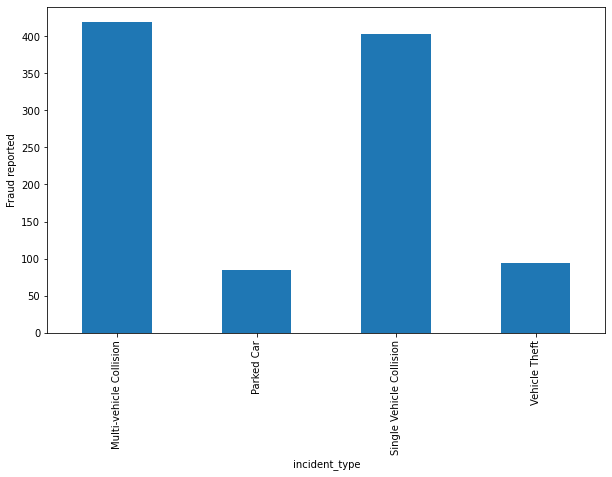

In [41]:
fig = plt.figure(figsize=(10,6))
ax = ds.groupby('incident_type').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

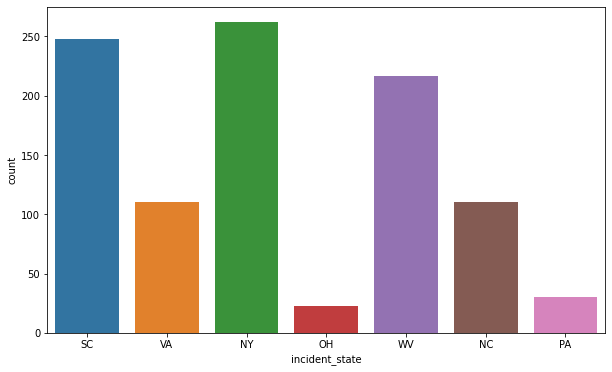

In [42]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='incident_state', data=ds)

NYC is the highest insident state

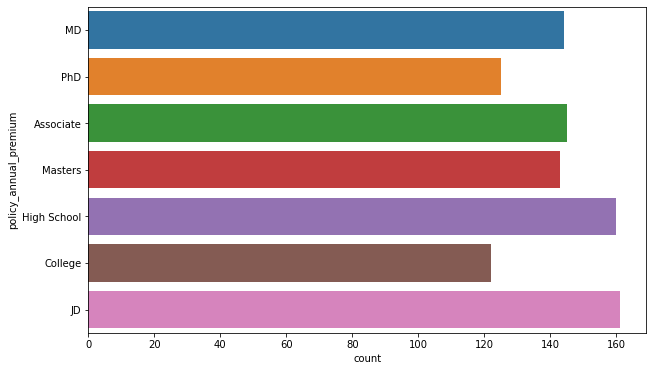

In [43]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(y = 'insured_education_level', data=ds) 
ax.set_ylabel('policy_annual_premium')
plt.show()

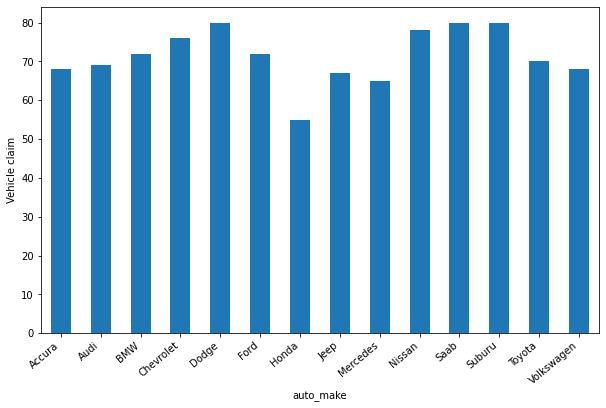

In [44]:
fig = plt.figure(figsize=(10,6))
ax= ds.groupby('auto_make').vehicle_claim.count().plot.bar(ylim=0)
ax.set_ylabel('Vehicle claim')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

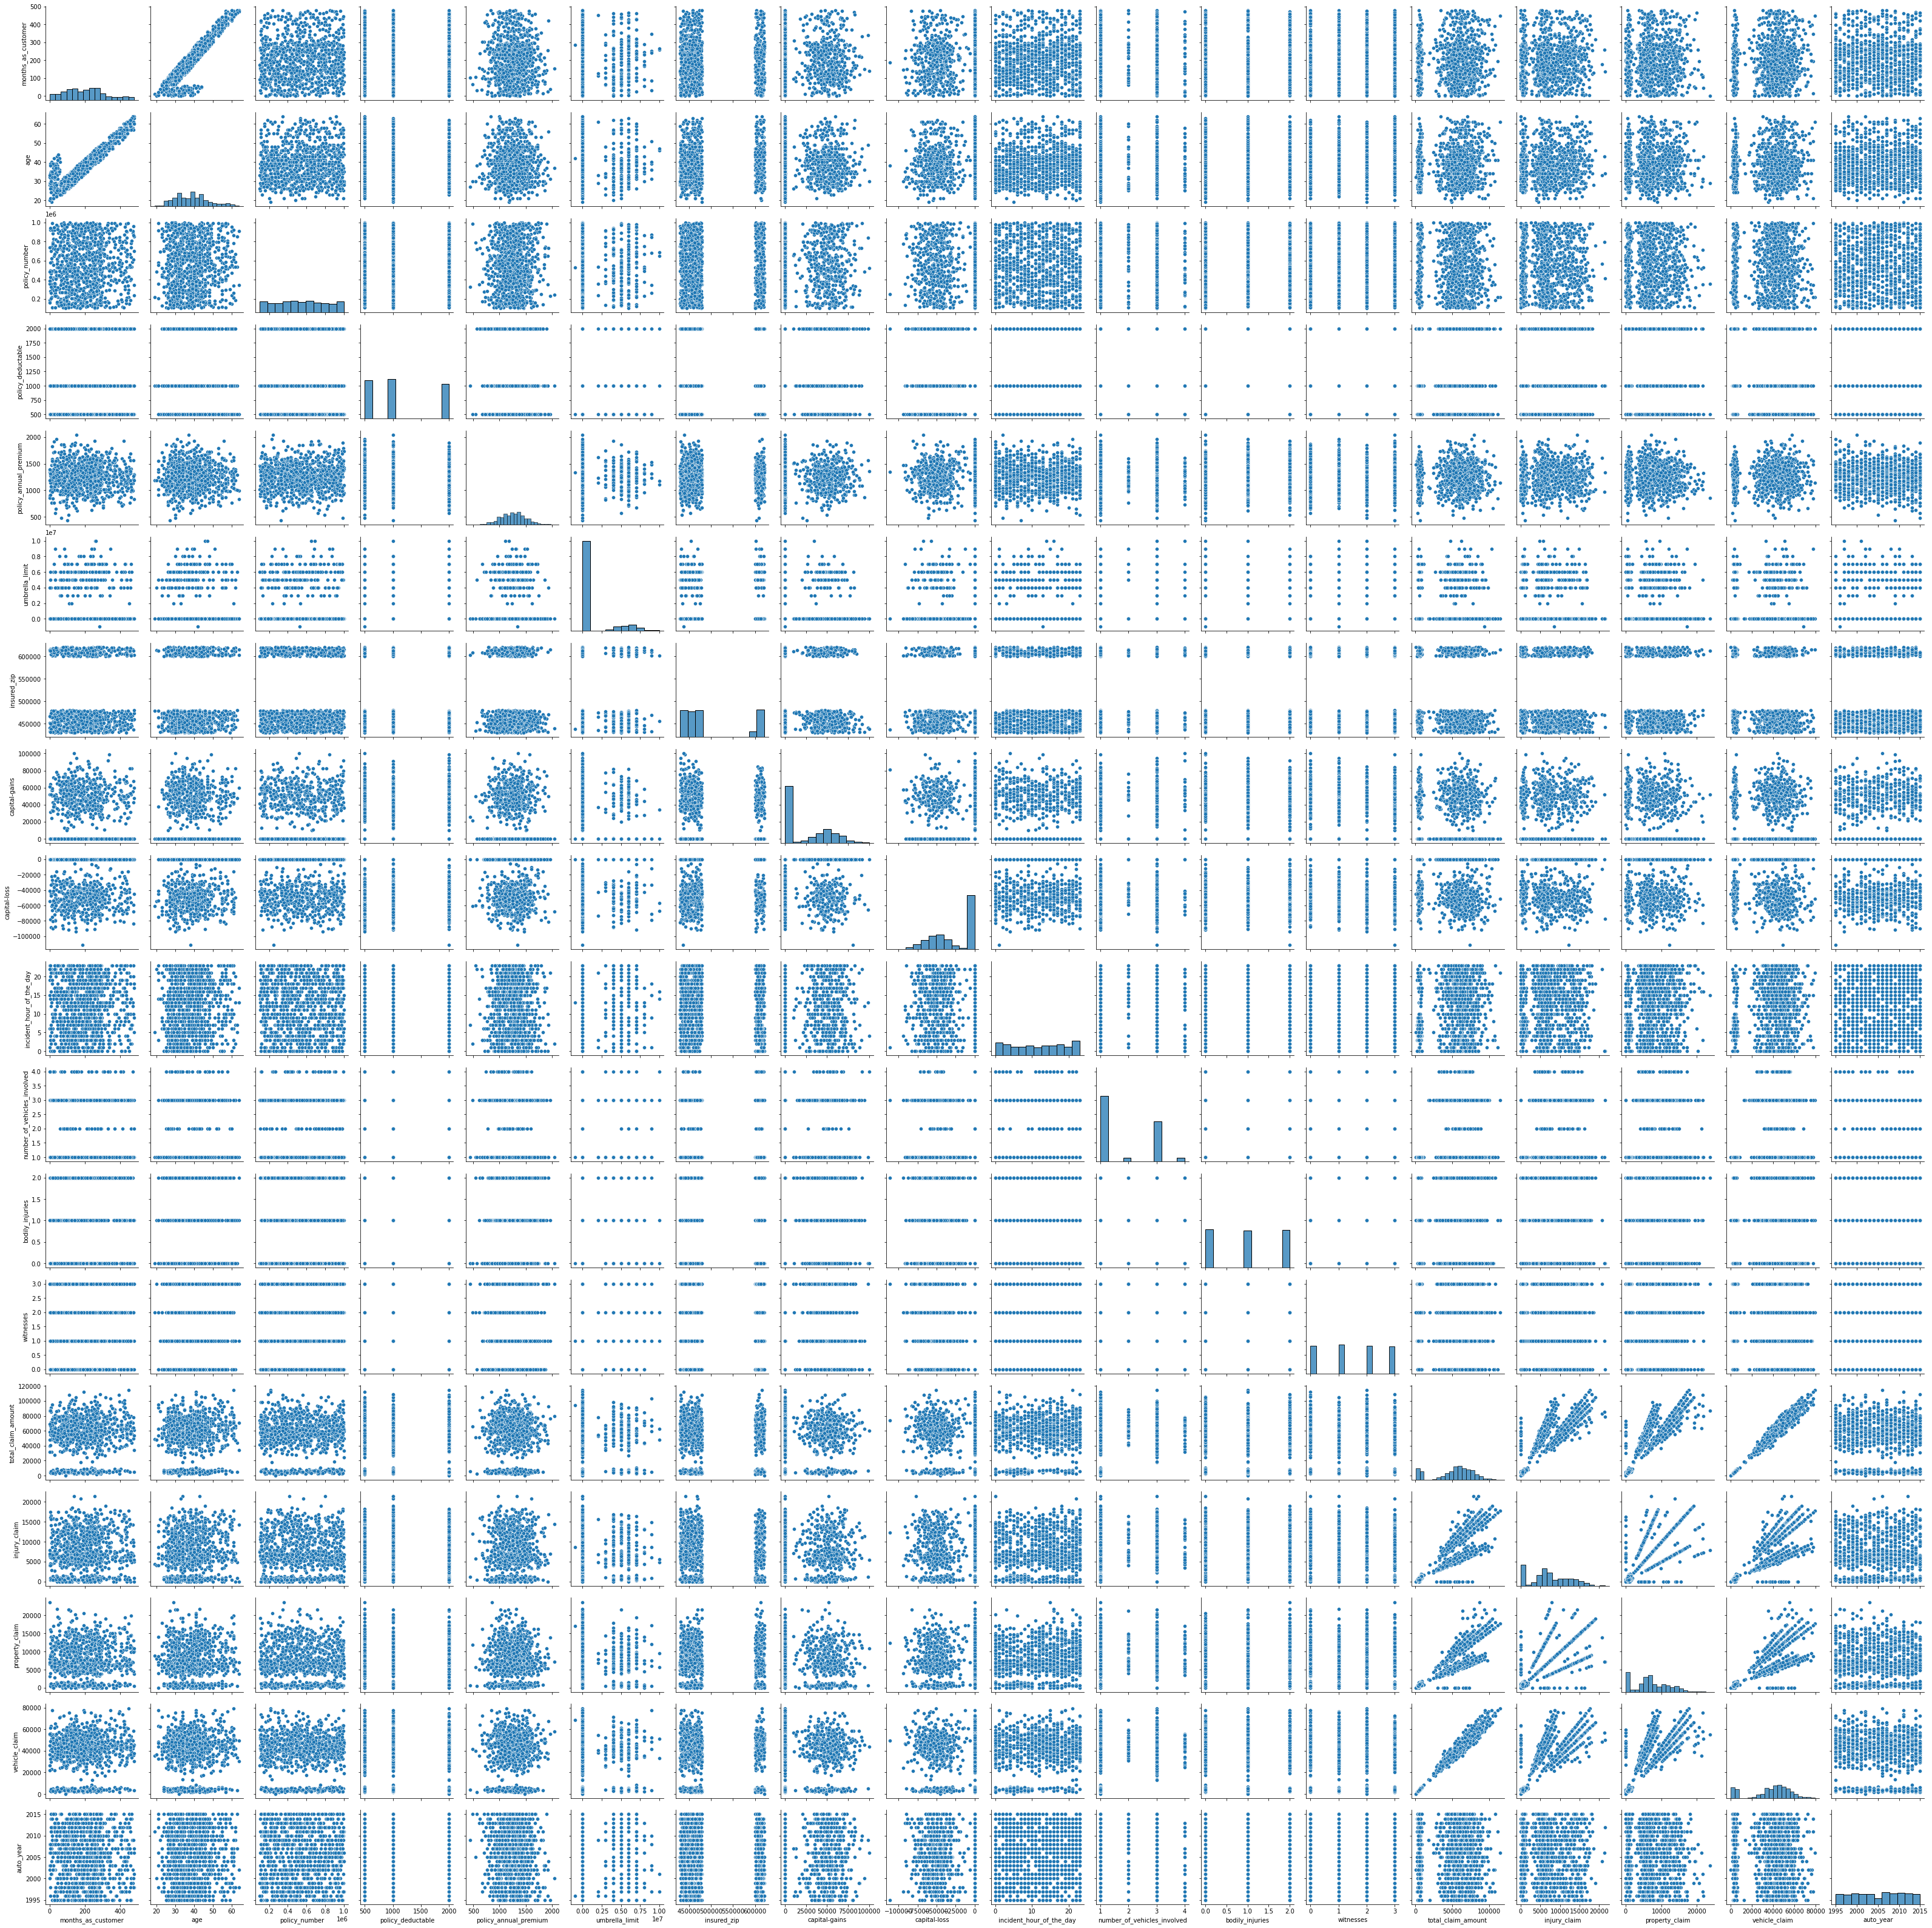

In [45]:
sns.pairplot(ds)

from above we can see all the possible graphs of the dataset

In [46]:
ds.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
dtype: float64

lets now fix the data which has ? and changing Y to 1 and N to 0

### Data Cleaning 

In [47]:
ds.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    25-01-2015  Single Vehicle Collision   Side Collision      Major Damage   
1    21-01-2015             Vehicle Theft                ?      Minor Damage   
2    22-02-2015   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    10-01-2015  Single Vehicle Collision  Front Collision      Major Damage   
4    17-02-2015             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

In [48]:
ds['fraud_reported'].replace(to_replace='Y', value=1, inplace=True)
ds['fraud_reported'].replace(to_replace='N',  value=0, inplace=True)

In [49]:
ds.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    25-01-2015  Single Vehicle Collision   Side Collision      Major Damage   
1    21-01-2015             Vehicle Theft                ?      Minor Damage   
2    22-02-2015   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    10-01-2015  Single Vehicle Collision  Front Collision      Major Damage   
4    17-02-2015             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

In [50]:
for i in ds.columns:
    print(ds[i].value_counts())

194    8
285    7
140    7
230    7
128    7
      ..
347    1
113    1
337    1
117    1
0      1
Name: months_as_customer, Length: 391, dtype: int64
43    49
39    48
41    45
34    44
30    42
31    42
38    42
37    41
33    39
32    38
40    38
29    35
46    33
35    32
36    32
42    32
44    32
28    30
45    26
26    26
48    25
47    24
27    24
57    16
25    14
49    14
55    14
50    13
53    13
61    10
24    10
54    10
60     9
51     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
22     1
20     1
19     1
Name: age, dtype: int64
116735    1
107181    1
430794    1
115399    1
328387    1
         ..
218456    1
179538    1
357713    1
247116    1
296960    1
Name: policy_number, Length: 1000, dtype: int64
01-01-2006    3
05-08-1992    3
28-04-1992    3
04-06-2000    2
07-12-1995    2
             ..
24-10-1997    1
11-09-2004    1
03-02-1993    1
11-07-2001    1
29-05-1999    1
Name: policy_bind_date, Length: 951, dtype: int64
OH   

from above we can see 'policy_bind_date', 'incident_date', 'incident_location' and 'insured_zip' contain very high number of level. We will remove these columns for our purposes.

In [51]:
ds.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    25-01-2015  Single Vehicle Collision   Side Collision      Major Damage   
1    21-01-2015             Vehicle Theft                ?      Minor Damage   
2    22-02-2015   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    10-01-2015  Single Vehicle Collision  Front Collision      Major Damage   
4    17-02-2015             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

In [52]:
ds.auto_year.value_counts()

1995    56
1999    55
2005    54
2011    53
2006    53
2007    52
2003    51
2010    50
2009    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

from above we can see the year of manufacturing of the vehicle so from this we can find out the age of the vehicle

In [53]:
ds['vehicle_age'] = 2015 - ds['auto_year']

In [54]:
ds.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    25-01-2015  Single Vehicle Collision   Side Collision      Major Damage   
1    21-01-2015             Vehicle Theft                ?      Minor Damage   
2    22-02-2015   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    10-01-2015  Single Vehicle Collision  Front Collision      Major Damage   
4    17-02-2015             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

lets now drop the columns which are not important to us

In [55]:
ds = ds.drop(columns = [
    'policy_number', 
    'insured_zip', 
    'policy_bind_date', 
    'incident_date', 
    'incident_location', 
    'auto_year', 
    'incident_hour_of_the_day'])

In [56]:
ds.head()

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                 328   48           OH    250/500               1000   
1                 228   42           IN    250/500               2000   
2                 134   29           OH    100/300               2000   
3                 256   41           IL    250/500               2000   
4                 228   44           IL   500/1000               1000   

   policy_annual_premium  umbrella_limit insured_sex insured_education_level  \
0                1406.91               0        MALE                      MD   
1                1197.22         5000000        MALE                      MD   
2                1413.14         5000000      FEMALE                     PhD   
3                1415.74         6000000      FEMALE                     PhD   
4                1583.91         6000000        MALE               Associate   

  insured_occupation insured_hobbies insured_relationship  capital-gains  \
0       craft-repair        sleeping              husband          53300   
1  machine-op-inspct         reading       other-relative              0   
2              sales     board-games            own-child          35100   
3       armed-forces     board-games            unmarried          48900   
4              sales     board-games            unmarried          66000   

   capital-loss             incident_type   collision_type incident_severity  \
0             0  Single Vehicle Collision   Side Collision      Major Damage   
1             0             Vehicle Theft                ?      Minor Damage   
2             0   Multi-vehicle Collision   Rear Collision      Minor Damage   
3        -62400  Single Vehicle Collision  Front Collision      Major Damage   
4        -46000             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  \
0                Police             SC      Columbus   
1                Police             VA     Riverwood   
2                Police             NY      Columbus   
3                Police             OH     Arlington   
4                  None             NY     Arlington   

   number_of_vehicles_involved property_damage  bodily_injuries  witnesses  \
0                            1             YES                1          2   
1                            1               ?                0          0   
2                            3              NO                2          3   
3                            1               ?                1          2   
4                            1              NO                0          1   

  police_report_available  total_claim_amount  injury_claim  property_claim  \
0                     YES               71610          6510           13020   
1                       ?                5070           780             780   
2                      NO               34650          7700            3850   
3                      NO               63400          6340            6340   
4                      NO                6500          1300             650   

   vehicle_claim  auto_make auto_model  fraud_reported  vehicle_age  
0          52080       Saab        92x               1           11  
1           3510   Mercedes       E400               1            8  
2          23100      Dodge        RAM               0            8  
3          50720  Chevrolet      Tahoe               1            1  
4           4550     Accura        RSX               0            6

from above we can see that we have successfully removed all the unnecessary columns from the dataset

lets now find the '?' variable in the dataset

In [57]:
questionmark = {}
for i in list(ds.columns):
    if (ds[i]).dtype == object:
        j = np.sum(ds[i] == "?")
        questionmark[i] = j
questionmark = pd.DataFrame.from_dict(questionmark, orient = 'index')
print(questionmark)

                           0
policy_state               0
policy_csl                 0
insured_sex                0
insured_education_level    0
insured_occupation         0
insured_hobbies            0
insured_relationship       0
incident_type              0
collision_type           178
incident_severity          0
authorities_contacted      0
incident_state             0
incident_city              0
property_damage          360
police_report_available  343
auto_make                  0
auto_model                 0


from above we can see that three columns named collision type, property damage and police_report_available has '?'

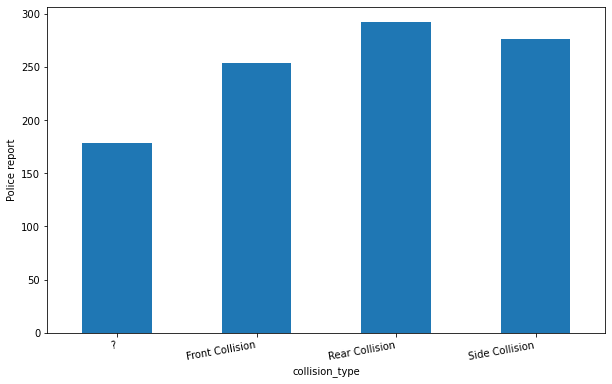

In [58]:
fig = plt.figure(figsize=(10,6))
ax= ds.groupby('collision_type').police_report_available.count().plot.bar(ylim=0)
ax.set_ylabel('Police report')
ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha="right")
plt.show()

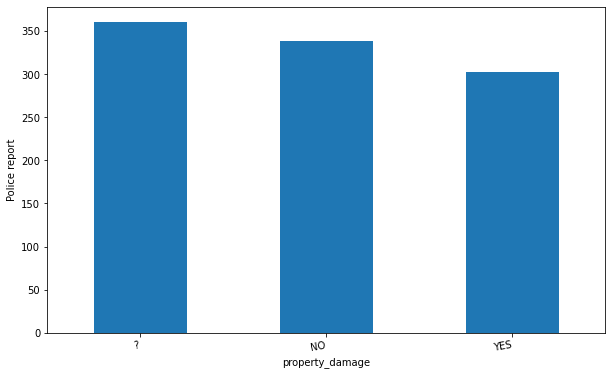

In [59]:
fig = plt.figure(figsize=(10,6))
ax= ds.groupby('property_damage').police_report_available.count().plot.bar(ylim=0)
ax.set_ylabel('Police report')
ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha="right")
plt.show()

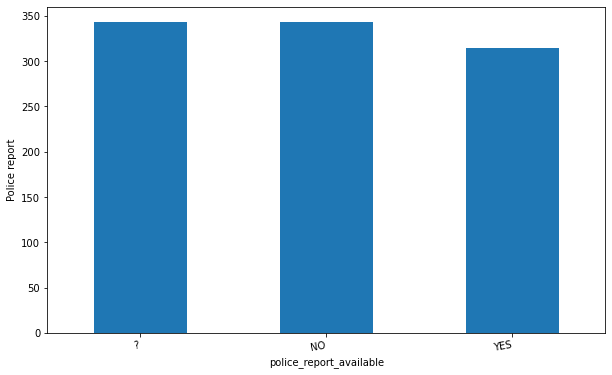

In [60]:
fig = plt.figure(figsize=(10,6))
ax= ds.groupby('police_report_available').police_report_available.count().plot.bar(ylim=0)
ax.set_ylabel('Police report')
ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha="right")
plt.show()

lets now select categorical column form the dataset

In [61]:
ds.select_dtypes(include=['object']).columns

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'property_damage', 'police_report_available', 'auto_make',
       'auto_model'],
      dtype='object')

from above we can see all the column names which are categorical

lets now do one hot encoding on the categorical columns

except out target variable 

In [62]:
ds.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'fraud_reported', 'vehicle_age'],
      dtype='object')

In [63]:
dsnew = pd.get_dummies(ds[[
    'policy_state', 
    'policy_csl', 
    'insured_sex', 
    'insured_education_level',
    'insured_occupation', 
    'insured_hobbies', 
    'insured_relationship',
    'incident_type', 
    'incident_severity',
    'authorities_contacted', 
    'incident_state', 
    'incident_city',
    'auto_make', 
    'auto_model']])

dsnew = dsnew.join(ds[[
    'collision_type', 
    'property_damage', 
    'police_report_available', 
    "fraud_reported"]])

In [64]:
dsnew

policy_state_IL  policy_state_IN  policy_state_OH  policy_csl_100/300  \
0                  0                0                1                   0   
1                  0                1                0                   0   
2                  0                0                1                   1   
3                  1                0                0                   0   
4                  1                0                0                   0   
..               ...              ...              ...                 ...   
995                0                0                1                   0   
996                1                0                0                   1   
997                0                0                1                   0   
998                1                0                0                   0   
999                0                0                1                   0   

     policy_csl_250/500  policy_csl_500/1000  insured_sex_FEMALE  \
0                     1                    0                   0   
1                     1                    0                   0   
2                     0                    0                   1   
3                     1                    0                   1   
4                     0                    1                   0   
..                  ...                  ...                 ...   
995                   0                    1                   1   
996                   0                    0                   1   
997                   1                    0                   1   
998                   0                    1                   0   
999                   1                    0                   1   

     insured_sex_MALE  insured_education_level_Associate  \
0                   1                                  0   
1                   1                                  0   
2                   0                                  0   
3                   0                                  0   
4                   1                                  1   
..                ...                                ...   
995                 0                                  0   
996                 0                                  0   
997                 0                                  0   
998                 1                                  1   
999                 0                                  1   

     insured_education_level_College  insured_education_level_High School  \
0                                  0                                    0   
1                                  0                                    0   
2                                  0                                    0   
3                                  0                                    0   
4                                  0                                    0   
..                               ...                                  ...   
995                                0                                    0   
996                                0                                    0   
997                                0                                    0   
998                                0                                    0   
999                                0                                    0   

     insured_education_level_JD  insured_education_level_MD  \
0                             0                           1   
1                             0                           1   
2                             0                           0   
3                             0                           0   
4                             0                           0   
..                          ...                         ...   
995                           0                           0   
996                           0                           0   
997                           0       

lets now seperate our dependent and independent variable

In [65]:
X = dsnew.drop('fraud_reported', axis = 1)
Y = dsnew['fraud_reported']

lets now do label encoding on collision_type column using Label Encoder

In [66]:
X['collision_type'] = LabelEncoder().fit_transform(dsnew['collision_type'])

In [67]:
X

policy_state_IL  policy_state_IN  policy_state_OH  policy_csl_100/300  \
0                  0                0                1                   0   
1                  0                1                0                   0   
2                  0                0                1                   1   
3                  1                0                0                   0   
4                  1                0                0                   0   
..               ...              ...              ...                 ...   
995                0                0                1                   0   
996                1                0                0                   1   
997                0                0                1                   0   
998                1                0                0                   0   
999                0                0                1                   0   

     policy_csl_250/500  policy_csl_500/1000  insured_sex_FEMALE  \
0                     1                    0                   0   
1                     1                    0                   0   
2                     0                    0                   1   
3                     1                    0                   1   
4                     0                    1                   0   
..                  ...                  ...                 ...   
995                   0                    1                   1   
996                   0                    0                   1   
997                   1                    0                   1   
998                   0                    1                   0   
999                   1                    0                   1   

     insured_sex_MALE  insured_education_level_Associate  \
0                   1                                  0   
1                   1                                  0   
2                   0                                  0   
3                   0                                  0   
4                   1                                  1   
..                ...                                ...   
995                 0                                  0   
996                 0                                  0   
997                 0                                  0   
998                 1                                  1   
999                 0                                  1   

     insured_education_level_College  insured_education_level_High School  \
0                                  0                                    0   
1                                  0                                    0   
2                                  0                                    0   
3                                  0                                    0   
4                                  0                                    0   
..                               ...                                  ...   
995                                0                                    0   
996                                0                                    0   
997                                0                                    0   
998                                0                                    0   
999                                0                                    0   

     insured_education_level_JD  insured_education_level_MD  \
0                             0                           1   
1                             0                           1   
2                             0                           0   
3                             0                           0   
4                             0                           0   
..                          ...                         ...   
995                           0                           0   
996                           0                           0   
997                           0       

from above we can see that we have successfully converted our collision_type column using label encoder

In [68]:
X['property_damage'].replace(to_replace='YES', value=1, inplace=True)
X['property_damage'].replace(to_replace='NO', value=0, inplace=True)
X['property_damage'].replace(to_replace='?', value=0, inplace=True)
X['police_report_available'].replace(to_replace='YES', value=1, inplace=True)
X['police_report_available'].replace(to_replace='NO', value=0, inplace=True)
X['police_report_available'].replace(to_replace='?', value=0, inplace=True)

In [69]:
pd.set_option('display.max_rows', None)
X.skew()

policy_state_IL                           0.685977
policy_state_IN                           0.822868
policy_state_OH                           0.620705
policy_csl_100/300                        0.634536
policy_csl_250/500                        0.625306
policy_csl_500/1000                       0.874183
insured_sex_FEMALE                       -0.148630
insured_sex_MALE                          0.148630
insured_education_level_Associate         2.019498
insured_education_level_College           2.313379
insured_education_level_High School       1.857640
insured_education_level_JD                1.847515
insured_education_level_MD                2.031019
insured_education_level_Masters           2.042641
insured_education_level_PhD               2.271195
insured_occupation_adm-clerical           3.534345
insured_occupation_armed-forces           3.406121
insured_occupation_craft-repair           3.259646
insured_occupation_exec-managerial        3.204832
insured_occupation_farming-fish

from above we can see the skewness only on categorical variable so we will not fix the skewness of the independent variable

In [70]:
zscr = np.abs(zscore(X))
threshold = 3
print(np.where(zscr>3))

(array([  0,   0,   0, ..., 999, 999, 999]), array([ 17,  46,  92, ...,  56,  90, 108]))


In [71]:
print("Shape before removing the outlier", X.shape)

Xnew = X[(zscr<3).all(axis=1)]

print("Shape after removing the outlier", Xnew.shape)

Shape before removing the outlier (1000, 138)
Shape after removing the outlier (0, 138)


from above we can see all the columns are being removed due to outliers of categorical varible we will not remove the outliers

In [72]:
X.shape

(1000, 138)

In [73]:
Y.shape

(1000,)

In [74]:
X.head()

policy_state_IL  policy_state_IN  policy_state_OH  policy_csl_100/300  \
0                0                0                1                   0   
1                0                1                0                   0   
2                0                0                1                   1   
3                1                0                0                   0   
4                1                0                0                   0   

   policy_csl_250/500  policy_csl_500/1000  insured_sex_FEMALE  \
0                   1                    0                   0   
1                   1                    0                   0   
2                   0                    0                   1   
3                   1                    0                   1   
4                   0                    1                   0   

   insured_sex_MALE  insured_education_level_Associate  \
0                 1                                  0   
1                 1                                  0   
2                 0                                  0   
3                 0                                  0   
4                 1                                  1   

   insured_education_level_College  insured_education_level_High School  \
0                                0                                    0   
1                                0                                    0   
2                                0                                    0   
3                                0                                    0   
4                                0                                    0   

   insured_education_level_JD  insured_education_level_MD  \
0                           0                           1   
1                           0                           1   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   insured_education_level_Masters  insured_education_level_PhD  \
0                                0                            0   
1                                0                            0   
2                                0                            1   
3                                0                            1   
4                                0                            0   

   insured_occupation_adm-clerical  insured_occupation_armed-forces  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                1   
4                                0                                0   

   insured_occupation_craft-repair  insured_occupation_exec-managerial  \
0                                1                                   0   
1                                0                                   0   
2                                0                                   0   
3                                0                                   0   
4                                0                                   0   

   insured_occupation_farming-fishing  insured_occupation_handlers-cleaners  \
0                                   0                                     0   
1                                   0                                     0   
2                                   0                                     0   
3                                   0                                     0   
4                                   0                                     0   

   insured_occupation_machine-op-inspct  insured_occupation_other-service  \
0                                     0                                 0   
1                                     1                                 0   
2

from above we can see all the values are in same scale so we will not be using Standard Scaler to scale the values

here we will not perform PCA as the number of column are not more

lets now divide our dataset into traning and testing state using train_test_split

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = 42)

here we are using random state as 42 later we will find the best random_state and fit all the model to see the accuracy and we will save the model which has the highest accuracy

In [76]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
lr.score(X_train, Y_train)

0.8961538461538462

In [77]:
predlr = lr.predict(X_test)
acclr = accuracy_score(Y_test, predlr)*100
print("Accuracy Score:", acclr)
print("Classification Report", classification_report(Y_test, predlr))
print("Confusion Matrix", confusion_matrix(Y_test, predlr))
print('\n')
print("F1 Score:", f1_score(Y_test, predlr))

Accuracy Score: 75.45454545454545
Classification Report               precision    recall  f1-score   support

           0       0.80      0.89      0.84       161
           1       0.56      0.37      0.45        59

    accuracy                           0.75       220
   macro avg       0.68      0.63      0.65       220
weighted avg       0.73      0.75      0.74       220

Confusion Matrix [[144  17]
 [ 37  22]]


F1 Score: 0.4489795918367347


from above we can see we are getting accuracy of 75.45% at random state 42 lets now find out the best random state and the best model

In [78]:
models = [LogisticRegression(), DecisionTreeClassifier(), ExtraTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), SVC(), KNeighborsClassifier(), GaussianNB(), XGBClassifier(verbosity = 0, silent = 0), XGBRFClassifier(verbosity = 0, silent = 0)]

In [79]:
maxacc = 0
maxrs = 0
model = 0
for i in range(0,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = i)
    for m in models:
        m.fit(X_train, Y_train)
        pred = m.predict(X_test)
        acc = accuracy_score(Y_test, pred)
        if acc > maxacc:
            maxacc = acc
            maxrs = i
            model = m
            
print("Maximum Accuracy is {} at Random State {} for model {}".format(maxacc, maxrs,  model))

Maximum Accuracy is 0.9045454545454545 at Random State 737 for model XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
                interaction_constraints='', max_delta_step=0, max_depth=6,
                min_child_weight=1, missing=nan, monotone_constraints='()',
                n_estimators=100, n_jobs=4, num_parallel_tree=100,
                objective='binary:logistic', random_state=0, reg_alpha=0,
                scale_pos_weight=1, silent=0, tree_method='exact',
                validate_parameters=1, verbosity=0)


from above we can see that the best accuracy score is 90.45% at Random State 737 lets now use random_state as 737 for all the columns

after finding the accuracy score we will also find the cross validation score and after that we will find the difference between cross validation and the accuracy score after that we will choose our best model

In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = 737)

In [81]:
print("Logistic Regression")
lr = LogisticRegression()
lr.fit(X_train, Y_train)
predlr = lr.predict(X_test)
acclr = accuracy_score(Y_test, predlr)*100
print("Accuracy Score:", acclr)
print("Classification Score:", classification_report(Y_test, predlr))
print("Confusion Matrix:", confusion_matrix(Y_test, predlr))
scorelr = cross_val_score(lr, X, Y, cv = 5)
scorelr = scorelr.mean()*100
print("Cross Validation Score:", scorelr)
f1lr = f1_score(Y_test, predlr)*100
print("F1 Score:", f1_score(Y_test, predlr)*100)

Logistic Regression
Accuracy Score: 85.45454545454545
Classification Score:               precision    recall  f1-score   support

           0       0.86      0.96      0.91       164
           1       0.82      0.55      0.66        56

    accuracy                           0.85       220
   macro avg       0.84      0.76      0.78       220
weighted avg       0.85      0.85      0.84       220

Confusion Matrix: [[157   7]
 [ 25  31]]
Cross Validation Score: 82.10000000000001
F1 Score: 65.95744680851064


In [82]:
print("Decision Tree")
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
predtc = dtc.predict(X_test)
accdtc = accuracy_score(Y_test, predtc)*100
print("Accuracy Score:", accdtc)
print("Classification Report", classification_report(Y_test, predtc))
print("Confusion Matrix", confusion_matrix(Y_test, predtc))
scoredtc = cross_val_score(dtc, X, Y, cv = 5)
scoredtc = scoredtc.mean()*100
print("Cross Validation Score:", scoredtc)
f1dtc = f1_score(Y_test, predtc)*100
print("F1 Score:", f1_score(Y_test, predtc)*100)

Decision Tree
Accuracy Score: 84.0909090909091
Classification Report               precision    recall  f1-score   support

           0       0.88      0.91      0.90       164
           1       0.71      0.62      0.67        56

    accuracy                           0.84       220
   macro avg       0.80      0.77      0.78       220
weighted avg       0.84      0.84      0.84       220

Confusion Matrix [[150  14]
 [ 21  35]]
Cross Validation Score: 77.3
F1 Score: 66.66666666666666


In [83]:
print("Extra Tree Classifier")
etc = ExtraTreeClassifier()
etc.fit(X_train, Y_train)
predetc = etc.predict(X_test)
accetc = accuracy_score(Y_test, predetc)*100
print("Accuracy Score", accetc)
print("Classification Report:", classification_report(Y_test, predetc))
print("Confusion Matrix:", confusion_matrix(Y_test, predetc))
scoreetc = cross_val_score(etc, X, Y, cv = 5)
scoreetc = scoreetc.mean()*100
print("Cross validation score:", scoreetc)
f1etc = f1_score(Y_test, predetc)*100
print("F1 Score:", f1_score(Y_test, predetc)*100)

Extra Tree Classifier
Accuracy Score 78.63636363636364
Classification Report:               precision    recall  f1-score   support

           0       0.83      0.89      0.86       164
           1       0.60      0.48      0.53        56

    accuracy                           0.79       220
   macro avg       0.72      0.69      0.70       220
weighted avg       0.77      0.79      0.78       220

Confusion Matrix: [[146  18]
 [ 29  27]]
Cross validation score: 75.79999999999998
F1 Score: 53.46534653465347


In [84]:
print("Random Forest")
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
predrfc = rfc.predict(X_test)
accrfc = accuracy_score(Y_test, predrfc)*100
print("Accuracy Score:", accrfc)
print("Classification Report", classification_report(Y_test, predrfc))
print("Confusion Matrix", confusion_matrix(Y_test, predrfc))
scorerfc = cross_val_score(rfc, X, Y, cv = 5)
scorerfc = scorerfc.mean()*100
print("Cross Validation Score:", scorerfc)
f1rfc = f1_score(Y_test, predrfc)*100
print("F1 Score:", f1_score(Y_test, predrfc))

Random Forest
Accuracy Score: 82.72727272727273
Classification Report               precision    recall  f1-score   support

           0       0.84      0.95      0.89       164
           1       0.75      0.48      0.59        56

    accuracy                           0.83       220
   macro avg       0.80      0.71      0.74       220
weighted avg       0.82      0.83      0.81       220

Confusion Matrix [[155   9]
 [ 29  27]]
Cross Validation Score: 81.69999999999999
F1 Score: 0.5869565217391304


In [85]:
print("AdaBoost Classifier")
adb = AdaBoostClassifier()
adb.fit(X_train, Y_train)
predadb = adb.predict(X_test)
accadb = accuracy_score(Y_test, predadb)*100
print("Accuracy Score:", accadb)
print("Classification Report", classification_report(Y_test, predadb))
print("Confusion Report", confusion_matrix(Y_test, predadb))
scoreadb = cross_val_score(adb, X, Y, cv = 5)
scoreadb = scoreadb.mean()*100
print("Cross Validation Score:", scoreadb)
f1adb = f1_score(Y_test, predadb)*100
print("F1 Score:", f1_score(Y_test, predadb))

AdaBoost Classifier
Accuracy Score: 85.9090909090909
Classification Report               precision    recall  f1-score   support

           0       0.86      0.97      0.91       164
           1       0.86      0.54      0.66        56

    accuracy                           0.86       220
   macro avg       0.86      0.75      0.79       220
weighted avg       0.86      0.86      0.85       220

Confusion Report [[159   5]
 [ 26  30]]
Cross Validation Score: 81.8
F1 Score: 0.6593406593406593


In [86]:
print("SVC")
svc = SVC()
svc.fit(X_train, Y_train)
predsvc = svc.predict(X_test)
accsvc = accuracy_score(Y_test, predsvc)*100
print("Accuracy Score:", accsvc)
print("Classification Report:", classification_report(Y_test, predsvc))
print("Confusion Matrix:", confusion_matrix(Y_test, predsvc))
scoresvc = cross_val_score(svc, X, Y, cv = 5)
scoresvc = scoresvc.mean()*100
print("Cross Validation Score:", scoresvc)
f1svc = f1_score(Y_test, predsvc)*100
print("F1 Score:", f1_score(Y_test, predsvc))

SVC
Accuracy Score: 84.0909090909091
Classification Report:               precision    recall  f1-score   support

           0       0.85      0.95      0.90       164
           1       0.78      0.52      0.62        56

    accuracy                           0.84       220
   macro avg       0.82      0.73      0.76       220
weighted avg       0.83      0.84      0.83       220

Confusion Matrix: [[156   8]
 [ 27  29]]
Cross Validation Score: 80.80000000000001
F1 Score: 0.6236559139784947


In [87]:
print("Gaussian NB")
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
predgnb = gnb.predict(X_test)
accgnb = accuracy_score(Y_test, predgnb)*100
print("Accuracy Score:", accgnb)
print("Classification Report:", classification_report(Y_test, predgnb))
print("Confusion Matrix:", confusion_matrix(Y_test, predgnb))
scoregnb = cross_val_score(gnb, X, Y, cv = 5)
scoregnb = scoregnb.mean()*100
print("Cross Validation Score:", scoregnb)
f1gnb = f1_score(Y_test, predgnb)*100
print("F1 Score:", f1_score(Y_test, predgnb))

Gaussian NB
Accuracy Score: 63.63636363636363
Classification Report:               precision    recall  f1-score   support

           0       0.88      0.60      0.71       164
           1       0.39      0.75      0.51        56

    accuracy                           0.64       220
   macro avg       0.63      0.67      0.61       220
weighted avg       0.75      0.64      0.66       220

Confusion Matrix: [[98 66]
 [14 42]]
Cross Validation Score: 61.3
F1 Score: 0.5121951219512195


In [88]:
print("KNeighbours")
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predknn = knn.predict(X_test)
accknn = accuracy_score(Y_test, predknn)*100
print("Accuracy Score:", accknn)
print("Classification Score:", classification_report(Y_test, predknn))
print("Confusion Matrix:", confusion_matrix(Y_test, predknn))
scoreknn = cross_val_score(knn, X, Y, cv = 5)
scoreknn = scoreknn.mean()*100
print("Cross Validation Score:", scoreknn)
f1knn = f1_score(Y_test, predknn)*100
print("F1 Score:", f1_score(Y_test, predknn))

KNeighbours
Accuracy Score: 78.18181818181819
Classification Score:               precision    recall  f1-score   support

           0       0.81      0.92      0.86       164
           1       0.62      0.38      0.47        56

    accuracy                           0.78       220
   macro avg       0.71      0.65      0.66       220
weighted avg       0.76      0.78      0.76       220

Confusion Matrix: [[151  13]
 [ 35  21]]
Cross Validation Score: 73.9
F1 Score: 0.4666666666666667


In [89]:
print("XGBoost")
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)
predxgb = xgb.predict(X_test)
accxgb = accuracy_score(Y_test, predxgb)*100
print("Accuracy Score:", accxgb)
print("Classification Report", classification_report(Y_test, predxgb))
print("Confusion Matrix:", confusion_matrix(Y_test, predxgb))
scorexgb = cross_val_score(xgb ,X, Y, cv = 5)
scorexgb = scorexgb.mean()*100
print("Cross Validation Score:", scorexgb)
f1xgb = f1_score(Y_test, predxgb)*100
print("F1 Score:", f1_score(Y_test, predxgb)*100)

XGBoost
Accuracy Score: 85.9090909090909
Classification Report               precision    recall  f1-score   support

           0       0.88      0.93      0.91       164
           1       0.77      0.64      0.70        56

    accuracy                           0.86       220
   macro avg       0.83      0.79      0.80       220
weighted avg       0.85      0.86      0.85       220

Confusion Matrix: [[153  11]
 [ 20  36]]
Cross Validation Score: 83.79999999999998
F1 Score: 69.90291262135922


In [90]:
print("XGRFClassifier")
xgbrfc = XGBRFClassifier()
xgbrfc.fit(X_train, Y_train)
predxgbrfc = xgbrfc.predict(X_test)
accxgbrfc = accuracy_score(Y_test, predxgbrfc)*100
print("Accuracy Score", accxgbrfc)
print("Classification Report:", classification_report(Y_test, predxgbrfc))
print("Confusion Matrix:", confusion_matrix(Y_test, predxgbrfc))
scorexgbrfc = cross_val_score(xgbrfc, X, Y, cv =5)
scorexgbrfc = scorexgbrfc.mean()*100
print("Cross Validation Score:", scorexgbrfc)
f1xgbrfc = f1_score(Y_test, predxgbrfc)*100
print("F1 Score:", f1_score(Y_test, predxgbrfc))

XGRFClassifier
Accuracy Score 90.45454545454545
Classification Report:               precision    recall  f1-score   support

           0       0.96      0.91      0.93       164
           1       0.78      0.88      0.82        56

    accuracy                           0.90       220
   macro avg       0.87      0.89      0.88       220
weighted avg       0.91      0.90      0.91       220

Confusion Matrix: [[150  14]
 [  7  49]]
Cross Validation Score: 84.39999999999999
F1 Score: 0.823529411764706


lets see all the models Accuracy score and Cross Validation Score

In [91]:
Compare = {
    'Model Name':['LogisticRegression', 'Decision Tree','Extra Tree', 'Random Forest','AdaBoost', 'SVC', 'Gaussian NB', 'KNeighbours', 'XGBoost', 'XGBRFClassifier'],
    'Accuracy Score':[acclr, accdtc, accetc, accrfc, accadb, accsvc, accgnb, accknn, accxgb, accxgbrfc],
    'Cross Validation Score':[scorelr ,scoredtc, scoreetc, scorerfc, scoreadb, scoresvc, scoregnb, scoreknn, scorexgb, scorexgbrfc],
    'Accuracy Score - Cross Validation Score':[acclr-scorelr, accdtc-scoredtc, accetc-scoreetc, accrfc-scorerfc, accadb-scoreadb ,accsvc-scoresvc, accgnb-scoregnb, accknn- scoreknn, accxgb-scorexgb, accxgbrfc-scorexgbrfc],
    'F1 Score':[f1lr, f1dtc, f1etc, f1rfc, f1adb, f1svc, f1gnb, f1knn, f1xgb, f1xgbrfc]
}

lets convert this dictionary to DataFrame so that we can see the differences easily

In [92]:
compare = pd.DataFrame.from_dict(Compare)

In [93]:
compare

Model Name  Accuracy Score  Cross Validation Score  \
0  LogisticRegression       85.454545                    82.1   
1       Decision Tree       84.090909                    77.3   
2          Extra Tree       78.636364                    75.8   
3       Random Forest       82.727273                    81.7   
4            AdaBoost       85.909091                    81.8   
5                 SVC       84.090909                    80.8   
6         Gaussian NB       63.636364                    61.3   
7         KNeighbours       78.181818                    73.9   
8             XGBoost       85.909091                    83.8   
9     XGBRFClassifier       90.454545                    84.4   

   Accuracy Score - Cross Validation Score   F1 Score  
0                                 3.354545  65.957447  
1                                 6.790909  66.666667  
2                                 2.836364  53.465347  
3                                 1.027273  58.695652  
4                                 4.109091  65.934066  
5                                 3.290909  62.365591  
6                                 2.336364  51.219512  
7                                 4.281818  46.666667  
8                                 2.109091  69.902913  
9                                 6.054545  82.352941

As this is a classification model we also have to look at F1 Score

from above we can see that Logistic Regression, Decision Tree, AdaBoost, SVC, XGBoost and XGBRFClassifier has done well in F1 score so we will choose this models for our final evalution for GridSearchCV

In [94]:
parameterlr = {
    'penalty':['l1','l2','elasticnet','None'],
    'C':[1,2,3,4],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'n_jobs':[1,2,3,4]
}

In [95]:
parameterdtc = {
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4]
}

In [96]:
parameteradb = {
    'n_estimators':[1,2,3,4,5],
    'algorithm':['SAMME','SAMME.R']
}

In [97]:
parametersvc = {
    'C':[1,2,3,4],
    'kernel':['linear','poly','rbf'],
    'degree':[1,2,3,4],
    'gamma':['scale','auto']
}

In [98]:
parameterxgb = {
    'booster':['gbtree','gblinear','dart'],
    'verbosity':[0],
    'silent':[0]
}

In [99]:
parameterxgbrfc = {
    'gamma':[1,2,3,4],
    'max_depth':[1,2,3,4],
    'lambda':[1,2,3,4],
    'alpha':[1,2,3,4],
    'updater':['grow_colmaker','grow_histmaker','grow_local_histmaker','grow_quantile_histmaker','grow_gpu_hist','sync','refresh','prune']
}

In [100]:
gscvlr = GridSearchCV(lr, parameterlr)
gscvdtc = GridSearchCV(dtc, parameterdtc)
gscvadb = GridSearchCV(adb, parameteradb)
gscvsvc = GridSearchCV(svc, parametersvc)
gscvxgb = GridSearchCV(xgb, parameterxgb)
gscvxgbrfc = GridSearchCV(xgbrfc, parameterxgbrfc)

In [101]:
gscvlr.fit(X_train, Y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4], 'n_jobs': [1, 2, 3, 4],
                         'penalty': ['l1', 'l2', 'elasticnet', 'None'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [102]:
gscv_predictlr = gscvlr.best_estimator_.predict(X_test)

In [103]:
gscvdtc.fit(X_train,Y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4],
                         'splitter': ['best', 'random']})

In [104]:
gscv_predictdtc = gscvdtc.best_estimator_.predict(X_test)

In [105]:
gscvadb.fit(X_train, Y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'n_estimators': [1, 2, 3, 4, 5]})

In [106]:
gscv_predictadb = gscvadb.best_estimator_.predict(X_test)

In [107]:
gscvsvc.fit(X_train, Y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4], 'degree': [1, 2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']})

In [108]:
gscv_predictsvc = gscvsvc.best_estimator_.predict(X_test)

In [109]:
gscvxgb.fit(X_train, Y_train)

GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=4,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
                            

In [110]:
gscv_predictxgb = gscvxgb.best_estimator_.predict(X_test)

In [111]:
gscvxgbrfc.fit(X_train, Y_train)

GridSearchCV(estimator=XGBRFClassifier(base_score=0.5, booster='gbtree',
                                       colsample_bylevel=1, colsample_bytree=1,
                                       gamma=0, gpu_id=-1,
                                       importance_type='gain',
                                       interaction_constraints='',
                                       max_delta_step=0, max_depth=6,
                                       min_child_weight=1, missing=nan,
                                       monotone_constraints='()',
                                       n_estimators=100, n_jobs=4,
                                       num_parallel_tree=100,
                                       objective='binary:logistic',
                                       random_state=0, reg_alpha=0,
                                       scale_pos_weight=1, tree_method='exact',
                                       validate_parameters=1, verbosity=None),
             param_grid={'

In [112]:
gscv_predictxgbrfc = gscvxgbrfc.best_estimator_.predict(X_test)

now lets see the accuracy score of all the models and see which one has performed good

In [113]:
print("Logistic Regression")
accglr = accuracy_score(Y_test, gscv_predictlr)*100
print("Accuracy Score after GridSearchCV:", accglr)
print("Classification Report:", classification_report(Y_test, gscv_predictlr))
print("Confusion Matrix:", confusion_matrix(Y_test, gscv_predictlr))

Logistic Regression
Accuracy Score after GridSearchCV: 86.36363636363636
Classification Report:               precision    recall  f1-score   support

           0       0.88      0.95      0.91       164
           1       0.81      0.61      0.69        56

    accuracy                           0.86       220
   macro avg       0.84      0.78      0.80       220
weighted avg       0.86      0.86      0.86       220

Confusion Matrix: [[156   8]
 [ 22  34]]


In [114]:
print("Decision Tree")
accgdtc = accuracy_score(Y_test, gscv_predictdtc)*100
print("Accuracy Score after GridSearchCV:", accgdtc)
print("Classification Report:", classification_report(Y_test, gscv_predictdtc))
print("Confusion Matrix:", confusion_matrix(Y_test, gscv_predictdtc))

Decision Tree
Accuracy Score after GridSearchCV: 90.0
Classification Report:               precision    recall  f1-score   support

           0       0.95      0.91      0.93       164
           1       0.77      0.86      0.81        56

    accuracy                           0.90       220
   macro avg       0.86      0.89      0.87       220
weighted avg       0.90      0.90      0.90       220

Confusion Matrix: [[150  14]
 [  8  48]]


In [115]:
print("Adaboost Classifier")
accgadb = accuracy_score(Y_test, gscv_predictadb)*100
print("Accuracy Score after GridSearchCV:", accgadb)
print("Classification Report:", classification_report(Y_test, gscv_predictadb))
print("Confusion Matrix:", confusion_matrix(Y_test, gscv_predictadb))

Adaboost Classifier
Accuracy Score after GridSearchCV: 85.9090909090909
Classification Report:               precision    recall  f1-score   support

           0       0.89      0.93      0.91       164
           1       0.76      0.66      0.70        56

    accuracy                           0.86       220
   macro avg       0.82      0.79      0.81       220
weighted avg       0.85      0.86      0.86       220

Confusion Matrix: [[152  12]
 [ 19  37]]


In [116]:
print("SVC")
accgsvc = accuracy_score(Y_test, gscv_predictsvc)*100
print("Accuracy Score after GridSearchCV:", accgsvc)
print("Classification Report:", classification_report(Y_test, gscv_predictsvc))
print("Confusion Matrix:", confusion_matrix(Y_test, gscv_predictsvc))

SVC
Accuracy Score after GridSearchCV: 85.0
Classification Report:               precision    recall  f1-score   support

           0       0.87      0.93      0.90       164
           1       0.76      0.61      0.67        56

    accuracy                           0.85       220
   macro avg       0.81      0.77      0.79       220
weighted avg       0.84      0.85      0.84       220

Confusion Matrix: [[153  11]
 [ 22  34]]


In [117]:
print("XGBoost")
accgxgb = accuracy_score(Y_test, gscv_predictxgb)*100
print("Accuracy Score after GridSearchCV:", accgxgb)
print("Classification Report:", classification_report(Y_test, gscv_predictxgb))
print("Confusion Matrix:", confusion_matrix(Y_test, gscv_predictxgb))

XGBoost
Accuracy Score after GridSearchCV: 85.9090909090909
Classification Report:               precision    recall  f1-score   support

           0       0.88      0.93      0.91       164
           1       0.77      0.64      0.70        56

    accuracy                           0.86       220
   macro avg       0.83      0.79      0.80       220
weighted avg       0.85      0.86      0.85       220

Confusion Matrix: [[153  11]
 [ 20  36]]


In [118]:
print("XGBRFClassifier")
accgxgbrfc = accuracy_score(Y_test, gscv_predictxgbrfc)*100
print("Accuracy Score after GridSearchCV:", accgxgbrfc)
print("Classification Report:", classification_report(Y_test, gscv_predictxgbrfc))
print("Confusion Matrix:", confusion_matrix(Y_test, gscv_predictxgbrfc))

XGBRFClassifier
Accuracy Score after GridSearchCV: 90.9090909090909
Classification Report:               precision    recall  f1-score   support

           0       0.96      0.91      0.94       164
           1       0.78      0.89      0.83        56

    accuracy                           0.91       220
   macro avg       0.87      0.90      0.89       220
weighted avg       0.92      0.91      0.91       220

Confusion Matrix: [[150  14]
 [  6  50]]


lets now see the Auc Roc curve for all the model and then we will select the best model

In [119]:
fpr, tpr, thresholds = roc_curve(Y_test, gscv_predictlr)
roc_auc = auc(fpr, tpr)
fpr1, tpr1, thresholds = roc_curve(Y_test, gscv_predictdtc)
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, thresholds = roc_curve(Y_test, gscv_predictadb)
roc_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, thresholds = roc_curve(Y_test, gscv_predictsvc)
roc_auc3 = auc(fpr3, tpr3)
fpr4, tpr4, thresholds = roc_curve(Y_test, gscv_predictxgb)
roc_auc4 = auc(fpr4, tpr4)
fpr5, tpr5, thresholds = roc_curve(Y_test, gscv_predictxgbrfc)
roc_auc5 = auc(fpr5, tpr5)

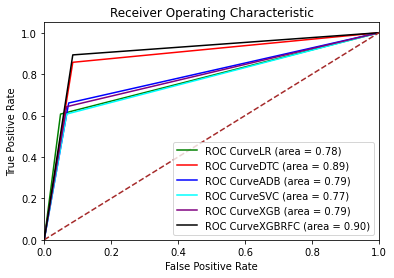

In [120]:
plt.figure()
plt.plot(fpr, tpr, color='green', label = "ROC CurveLR (area = %0.2f)" %roc_auc)
plt.plot(fpr1, tpr1, color='red', label = "ROC CurveDTC (area = %0.2f)" %roc_auc1)
plt.plot(fpr2, tpr2, color='blue', label = "ROC CurveADB (area = %0.2f)" %roc_auc2)
plt.plot(fpr3, tpr3, color='cyan', label = "ROC CurveSVC (area = %0.2f)" %roc_auc3)
plt.plot(fpr4, tpr4, color='purple', label = "ROC CurveXGB (area = %0.2f)" %roc_auc4)
plt.plot(fpr5, tpr5, color='black', label = "ROC CurveXGBRFC (area = %0.2f)" %roc_auc5)
plt.plot([0,1],[0,1], color='brown', linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")

## from above we can see that XGBRFClassifier is measuring the performance across all possible classification thresholds with an Area under Curve of 90% so we are choosing this model as our final model

from above we can see that XGBRFClassifier has the highest accuracy and highest F1 score to so we will save this as our best model using joblib.dump

### Saving the model

In [121]:
joblib.dump(gscvxgbrfc.best_estimator_, 'InsuranceFraudDetection.pkl')

['InsuranceFraudDetection.pkl']

### from using the InsuranceFraudDetection.pkl file we can predict another dataset with same columns